In [1]:
# <span style="color: blue;">ISBSG Data Analysis & Regression</span>


In [2]:
# # ISBSG Data Analysis and Regression Modeling
# 
# This notebook performs data cleaning, preprocessing, and regression modeling on the ISBSG dataset.

# ## Setup and Environment Configuration

# Install required packages (uncomment if needed)
#!pip install -r "../requirements.txt"

In [3]:
import sys

print(sys.executable)

C:\Users\jdche\.conda\envs\pycaret311\python.exe


In [4]:
# Import basic libraries
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pycaret
from datetime import datetime
import re
import seaborn as sns
import sklearn
import shap

<span style="color: blue;font-weight: bold; font-size: 40px;">PyCaret: ISBSG Data Analysis & Regression </span>


In [5]:
# Define the foler path
models_folder = '../models'
plots_folder = '../plots'
temp_folder = '../temp'
data_folder = '../data'
logs_folder = '../logs'

<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Data Profiling
- [Part 4](#part4)- Module Building with PyCaret
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End


In [6]:
# Configure timestamp callback for Jupyter cells
from IPython import get_ipython

def setup_timestamp_callback():
    """Setup a timestamp callback for Jupyter cells without clearing existing callbacks."""
    ip = get_ipython()
    if ip is not None:
        # Define timestamp function
        def print_timestamp(*args, **kwargs):
            """Print timestamp after cell execution."""
            print(f"Cell executed at: {datetime.now()}")
        
        # Check if our callback is already registered
        callbacks = ip.events.callbacks.get('post_run_cell', [])
        for cb in callbacks:
            if hasattr(cb, '__name__') and cb.__name__ == 'print_timestamp':
                # Already registered
                return
                
        # Register new callback if not already present
        ip.events.register('post_run_cell', print_timestamp)
        print("Timestamp printing activated.")
    else:
        print("Not running in IPython/Jupyter environment.")

# Setup timestamp callback
setup_timestamp_callback()

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Timestamp printing activated.
Cell executed at: 2025-05-24 19:09:40.014766


[Back to top](#Index:)

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [7]:
# Load the data

from pathlib import Path

print("Loading data...")

file_path = f"{data_folder}/ISBSG2016R1.1_Formatted4CSVAgileOnly_cleaned.csv"
file_name_no_ext = Path(file_path).stem                # 'ISBSG2016R1.1 - FormattedForCSV'
print(file_name_no_ext)


df = pd.read_csv(file_path)


Loading data...
ISBSG2016R1.1_Formatted4CSVAgileOnly_cleaned
Cell executed at: 2025-05-24 19:09:40.042277


# Exploratory Data Analysis

## Data Overview

Dataset shape: (85, 50)
First 5 rows:


isbsg_project_id external_eef_data_quality_rating  \
0             10279                                b   
1             10317                                b   
2             10572                                b   
3             11278                                a   
4             11497                                b   

   project_prf_year_of_project external_eef_industry_sector  \
0                         2013                      banking   
1                         2015                   government   
2                         2014                   government   
3                         2010             service industry   
4                         2012                      banking   

                      external_eef_organisation_type  \
0  banking; communications; education institution...   
1                                         government   
2                                         government   
3                                 community services   
4  banking; communications; education institution...   

  project_prf_application_group  \
0          business application   
1          business application   
2          business application   
3          business application   
4          business application   

                        project_prf_application_type  \
0                          surveillance and security   
1                               business application   
2                               business application   
3  complex process control; workflow support & ma...   
4                          surveillance and security   

  project_prf_development_type tech_tf_development_platform  \
0                  enhancement                           pc   
1                  enhancement                          NaN   
2                  enhancement                          NaN   
3                  enhancement                        multi   
4                  enhancement                           pc   

  tech_tf_language_type  ... people_prf_it_experience_great_than_3_yr  \
0                   3GL  ...                                      NaN   
1                   4GL  ...                                      NaN   
2                   4GL  ...                                      NaN   
3                   3GL  ...                                      NaN   
4                   3GL  ...                                      NaN   

   people_prf_it_experience_less_than_3_yr people_prf_it_experience_3_to_9_yr  \
0                                      NaN                                NaN   
1                                      NaN                                NaN   
2                                      NaN                                NaN   
3                                      0.0                                5.0   
4                                      NaN                                NaN   

   people_prf_it_experience_great_than_9_yr  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       4.0   
4                                       NaN   

   people_prf_project_manage_experience  people_prf_project_manage_changes  \
0                                   NaN                                NaN   
1                                   NaN                                NaN   
2                                   NaN                                NaN   
3                                   3.0                                0.0   
4                                   NaN                                NaN   

   people_prf_personnel_changes  project_prf_total_project_cost  \
0                           NaN                             NaN   
1                           NaN                         81500.0   
2                           NaN                         69850.0   
3                           3.0                             NaN   
4         

Last 5 rows:


isbsg_project_id external_eef_data_quality_rating  \
80             31166                                a   
81             31969                                b   
82             32296                                b   
83             32692                                b   
84             32725                                b   

    project_prf_year_of_project external_eef_industry_sector  \
80                         2011                   government   
81                         2013                      banking   
82                         2010                    utilities   
83                         2010                    education   
84                         2013                      banking   

                       external_eef_organisation_type  \
80                                         government   
81  banking; communications; education institution...   
82                                             energy   
83                              education institution   
84  banking; communications; education institution...   

   project_prf_application_group      project_prf_application_type  \
80       infrastructure software       data or database management   
81          business application         surveillance and security   
82          business application  customer relationship management   
83          business application        student & tests management   
84          business application         surveillance and security   

   project_prf_development_type tech_tf_development_platform  \
80              new development                           pc   
81                  enhancement                           pc   
82              new development                  proprietary   
83              new development                  proprietary   
84                  enhancement                           pc   

   tech_tf_language_type  ... people_prf_it_experience_great_than_3_yr  \
80                   4GL  ...                                      NaN   
81                   3GL  ...                                      NaN   
82                   5GL  ...                                      NaN   
83                   5GL  ...                                      NaN   
84                   3GL  ...                                      NaN   

    people_prf_it_experience_less_than_3_yr  \
80                                      NaN   
81                                      NaN   
82                                      NaN   
83                                      NaN   
84                                      NaN   

   people_prf_it_experience_3_to_9_yr  \
80                                NaN   
81                                NaN   
82                                NaN   
83                                NaN   
84                                NaN   

    people_prf_it_experience_great_than_9_yr  \
80                                       2.0   
81                                       NaN   
82                                       NaN   
83                                       NaN   
84                                       NaN   

    people_prf_project_manage_experience  people_prf_project_manage_changes  \
80                                  45.0                                0.0   
81                                   NaN                                NaN   
82                                   NaN                                NaN   
83                                   NaN                                NaN   
84                                   NaN                                NaN   

    people_prf_personnel_changes  project_prf_total_project_cost  \
80                           1.0                        765000.0   
81                           NaN                             NaN   
82                           NaN                             NaN   
83                           NaN                             NaN   
84                           NaN                

## Duplicate Rows

Number of duplicate rows: 0


## Data Types and Memory Usage

Data Type  Memory Usage (MB)
Index                                               NaN           0.000126
external_eef_data_quality_rating                 object           0.004702
external_eef_industry_sector                     object           0.005477
external_eef_organisation_type                   object           0.008986
isbsg_project_id                                  int64           0.000648
people_prf_ba_team_experience_1_to_3_yr         float64           0.000648
people_prf_ba_team_experience_great_than_3_yr   float64           0.000648
people_prf_ba_team_experience_less_than_1_yr    float64           0.000648
people_prf_it_experience_1_to_3_yr              float64           0.000648
people_prf_it_experience_3_to_9_yr              float64           0.000648
people_prf_it_experience_great_than_3_yr        float64           0.000648
people_prf_it_experience_great_than_9_yr        float64           0.000648
people_prf_it_experience_less_than_1_yr         float64           0.000648
people_prf_it_experience_less_than_3_yr         float64           0.000648
people_prf_personnel_changes                    float64           0.000648
people_prf_project_manage_changes               float64           0.000648
people_prf_project_manage_experience            float64           0.000648
people_prf_project_user_involvement             float64           0.000648
process_pmf_development_methodologies            object           0.006340
process_pmf_docs                                  int64           0.000648
process_pmf_prototyping_used                     object           0.002701
project_prf_application_group                    object           0.006050
project_prf_application_type                     object           0.007549
project_prf_case_tool_used                       object           0.002960
project_prf_cost_currency                        object           0.003673
project_prf_currency_multiple                    object           0.003047
project_prf_defect_density                      float64           0.000648
project_prf_development_type                     object           0.005646
project_prf_functional_size                     float64           0.000648
project_prf_manpower_delivery_rate              float64           0.000648
project_prf_max_team_size                       float64           0.000648
project_prf_normalised_level_1_pdr_ufp          float64           0.000648
project_prf_normalised_pdr_ufp                  float64           0.000648
project_prf_normalised_work_effort                int64           0.000648
project_prf_project_elapsed_time                float64           0.000648
project_prf_relative_size                        object           0.004739
project_prf_speed_of_delivery                   float64           0.000648
project_prf_team_size_group                      object           0.004095
project_prf_total_project_cost                  float64           0.000648
project_prf_year_of_project                       int64           0.000648
tech_tf_architecture                             object           0.005707
tech_tf_client_roles                             object           0.004317
tech_tf_client_server                            object           0.003392
tech_tf_dbms_used                                object           0.004089
tech_tf_development_platform                     object           0.004525
tech_tf_language_type                            object           0.004864
tech_tf_primary_programming_language             object           0.005158
tech_tf_server_roles                             object           0.004316
tech_tf_tools_used                              float64           0.000648
tech_tf_type_of_server                          float64           0.000648
tech_tf_web_development                          object           0.003502

## Unique Values Per Column

isbsg_project_id: 84 unique values
external_eef_data_quality_rating: 2 unique values
project_prf_year_of_project: 9 unique values
external_eef_industry_sector: 11 unique values
external_eef_organisation_type: 25 unique values
project_prf_application_group: 4 unique values
project_prf_application_type: 32 unique values
project_prf_development_type: 3 unique values
tech_tf_development_platform: 4 unique values
tech_tf_language_type: 3 unique values
tech_tf_primary_programming_language: 9 unique values
project_prf_functional_size: 75 unique values
project_prf_relative_size: 6 unique values
project_prf_normalised_work_effort: 78 unique values
project_prf_normalised_level_1_pdr_ufp: 63 unique values
project_prf_normalised_pdr_ufp: 62 unique values
project_prf_defect_density: 13 unique values
project_prf_speed_of_delivery: 75 unique values
project_prf_manpower_delivery_rate: 44 unique values
project_prf_project_elapsed_time: 20 unique values
project_prf_team_size_group: 8 unique values
proje

## Type Conversion Suggestions

Consider converting to 'category' dtype for memory/performance:
['external_eef_data_quality_rating', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_group', 'project_prf_development_type', 'tech_tf_development_platform', 'tech_tf_language_type', 'tech_tf_primary_programming_language', 'project_prf_relative_size', 'project_prf_team_size_group', 'project_prf_case_tool_used', 'process_pmf_development_methodologies', 'process_pmf_prototyping_used', 'tech_tf_architecture', 'tech_tf_client_server', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_web_development', 'tech_tf_dbms_used', 'project_prf_cost_currency', 'project_prf_currency_multiple']


## Summary Statistics

## Missing Values

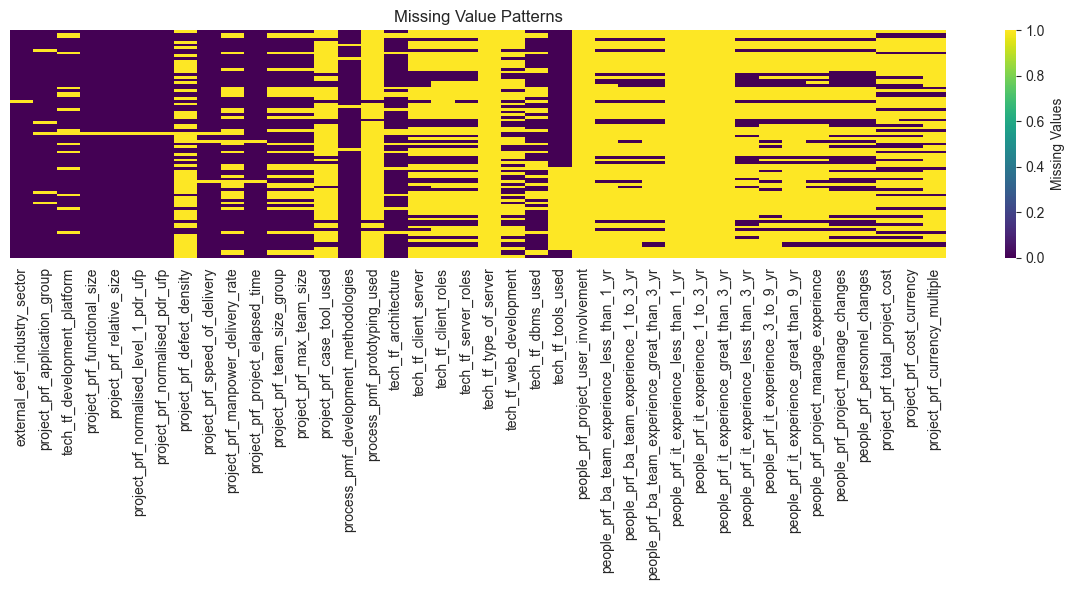

## Distribution of Numerical Features

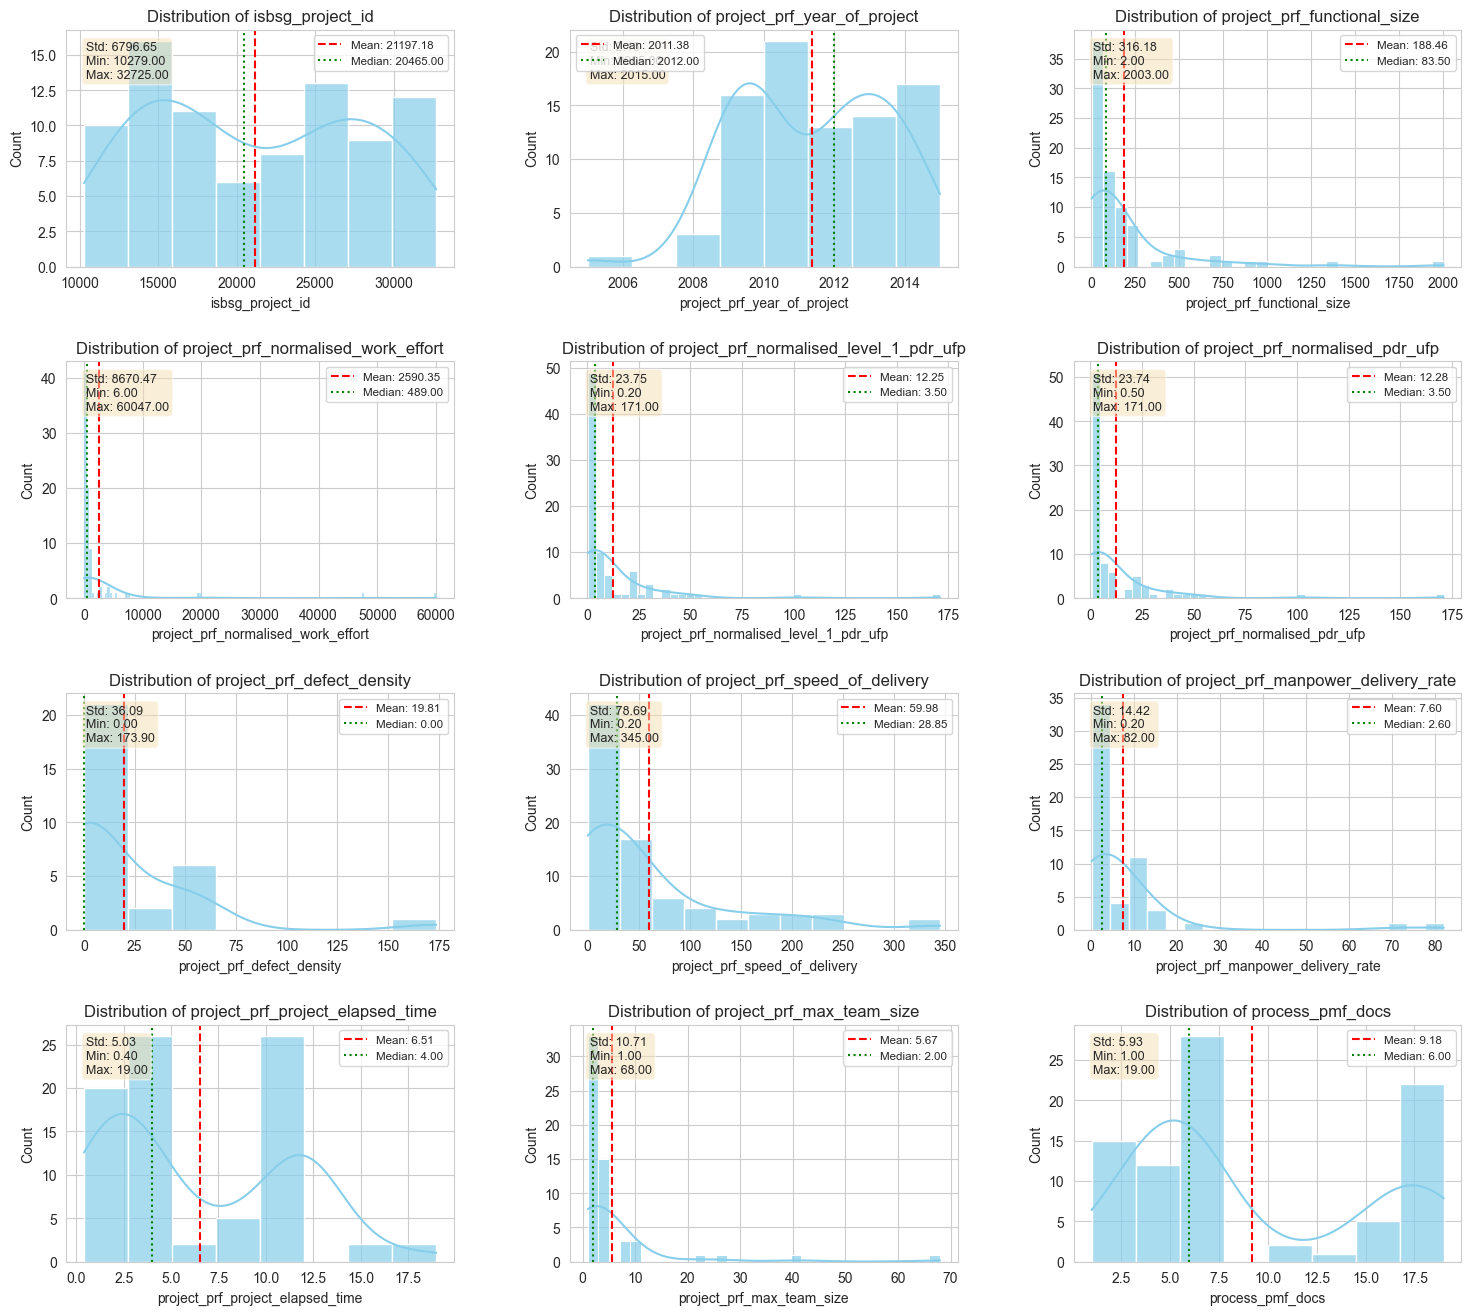

## Correlation Matrix

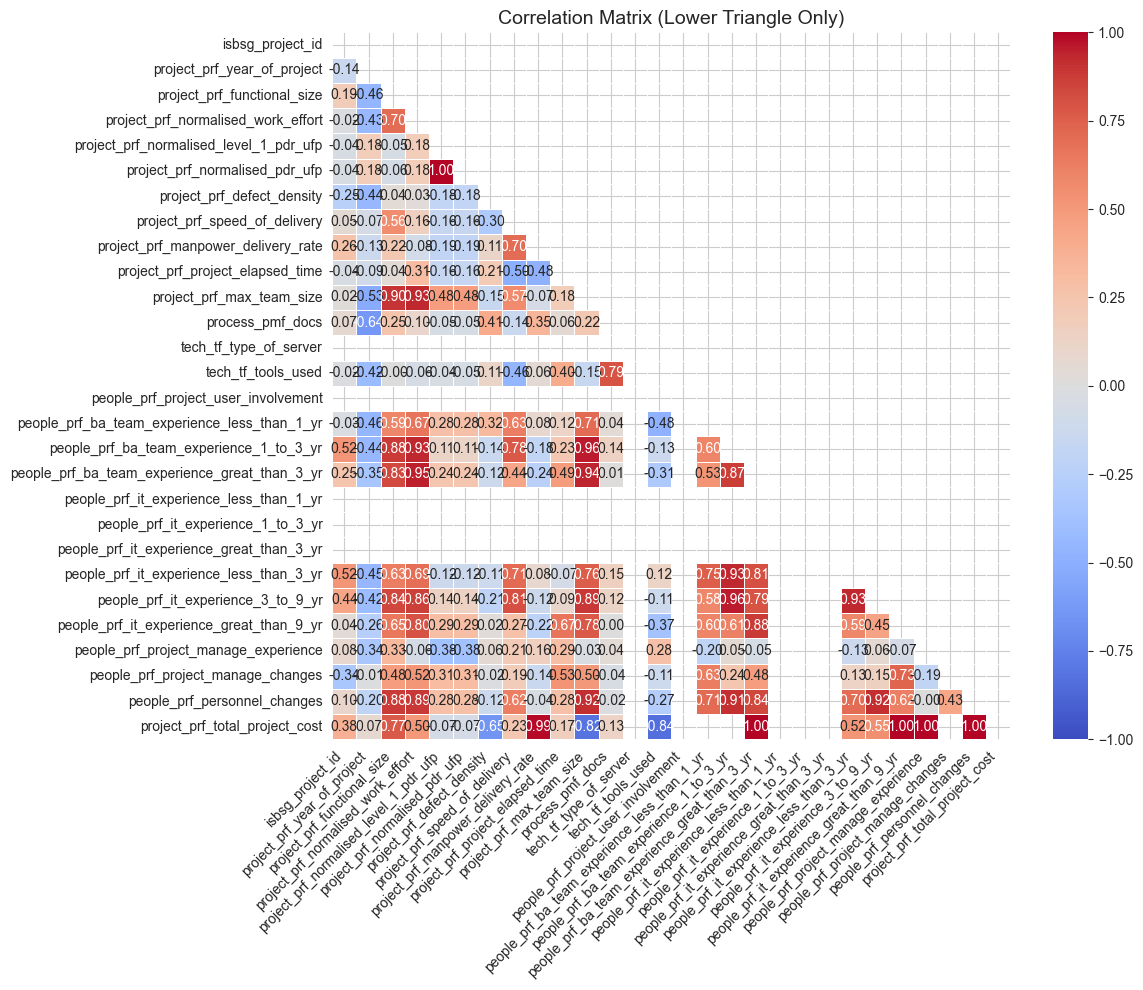

## Top Correlations

project_prf_total_project_cost ‚Äî project_prf_manpower_delivery_rate: 0.99
project_prf_manpower_delivery_rate ‚Äî project_prf_total_project_cost: 0.99
project_prf_max_team_size ‚Äî people_prf_ba_team_experience_1_to_3_yr: 0.96
people_prf_ba_team_experience_1_to_3_yr ‚Äî people_prf_it_experience_3_to_9_yr: 0.96
people_prf_it_experience_3_to_9_yr ‚Äî people_prf_ba_team_experience_1_to_3_yr: 0.96
people_prf_ba_team_experience_1_to_3_yr ‚Äî project_prf_max_team_size: 0.96
project_prf_normalised_work_effort ‚Äî people_prf_ba_team_experience_great_than_3_yr: 0.95
people_prf_ba_team_experience_great_than_3_yr ‚Äî project_prf_normalised_work_effort: 0.95
project_prf_max_team_size ‚Äî people_prf_ba_team_experience_great_than_3_yr: 0.94
people_prf_ba_team_experience_great_than_3_yr ‚Äî project_prf_max_team_size: 0.94
project_prf_normalised_work_effort ‚Äî project_prf_max_team_size: 0.93
project_prf_max_team_size ‚Äî project_prf_normalised_work_effort: 0.93
people_prf_it_experience_less_than_3_y

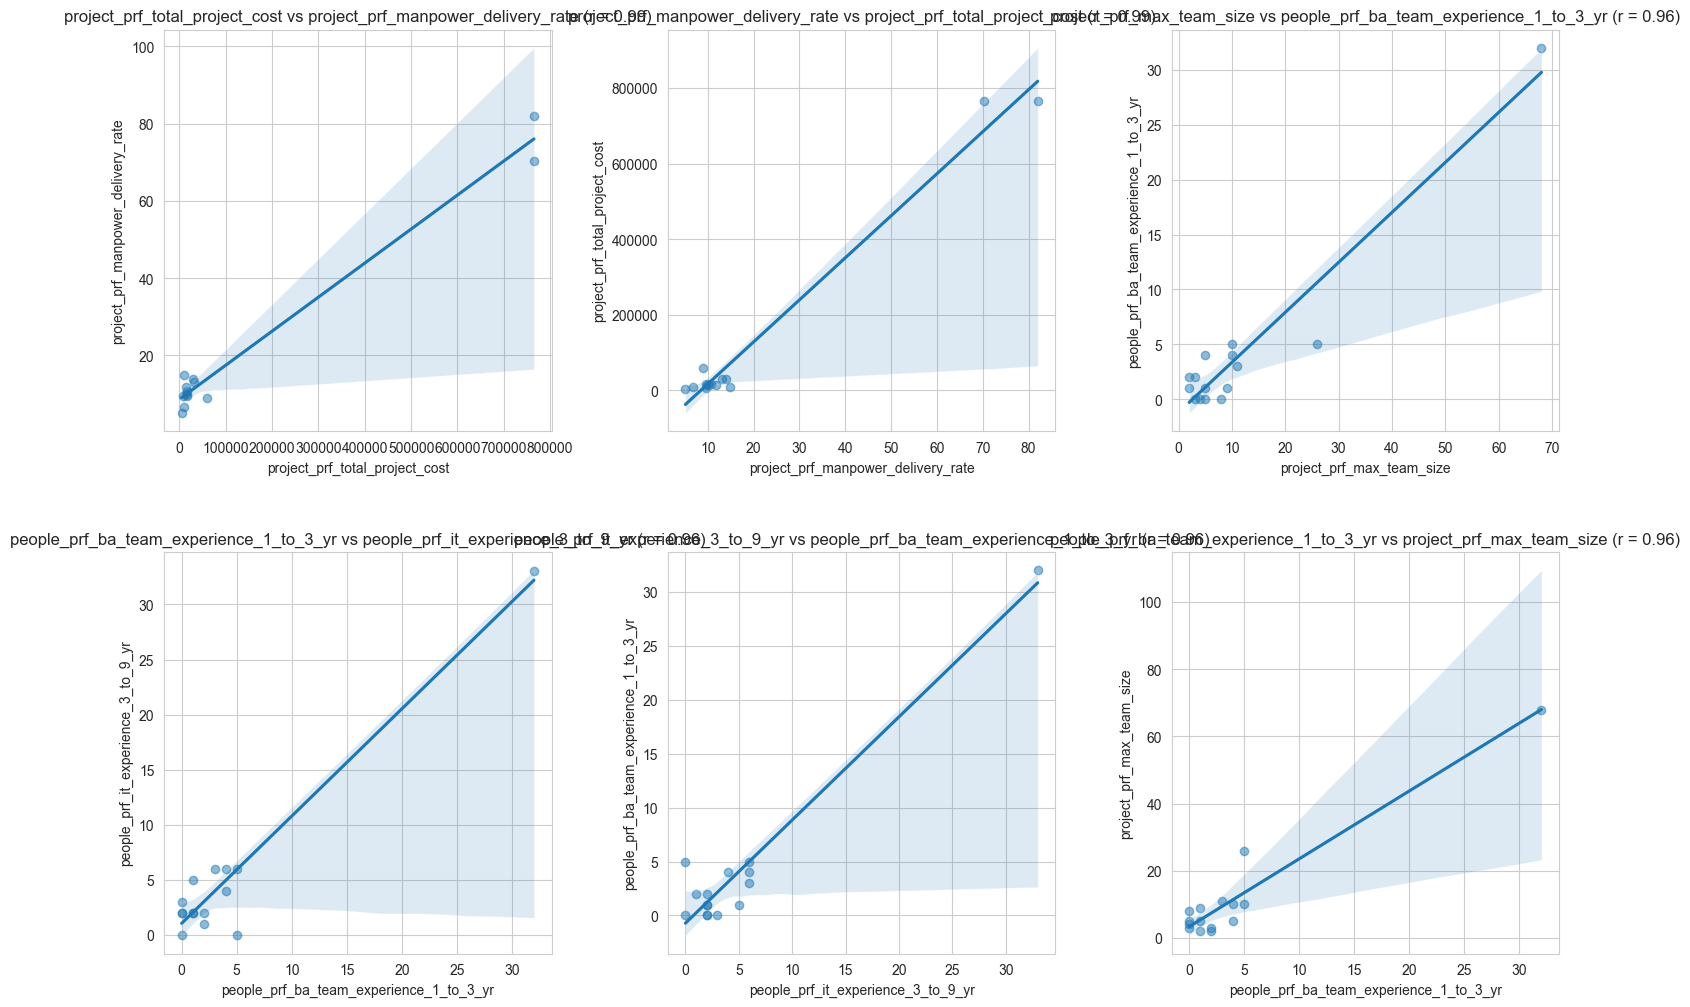

## Categorical Features

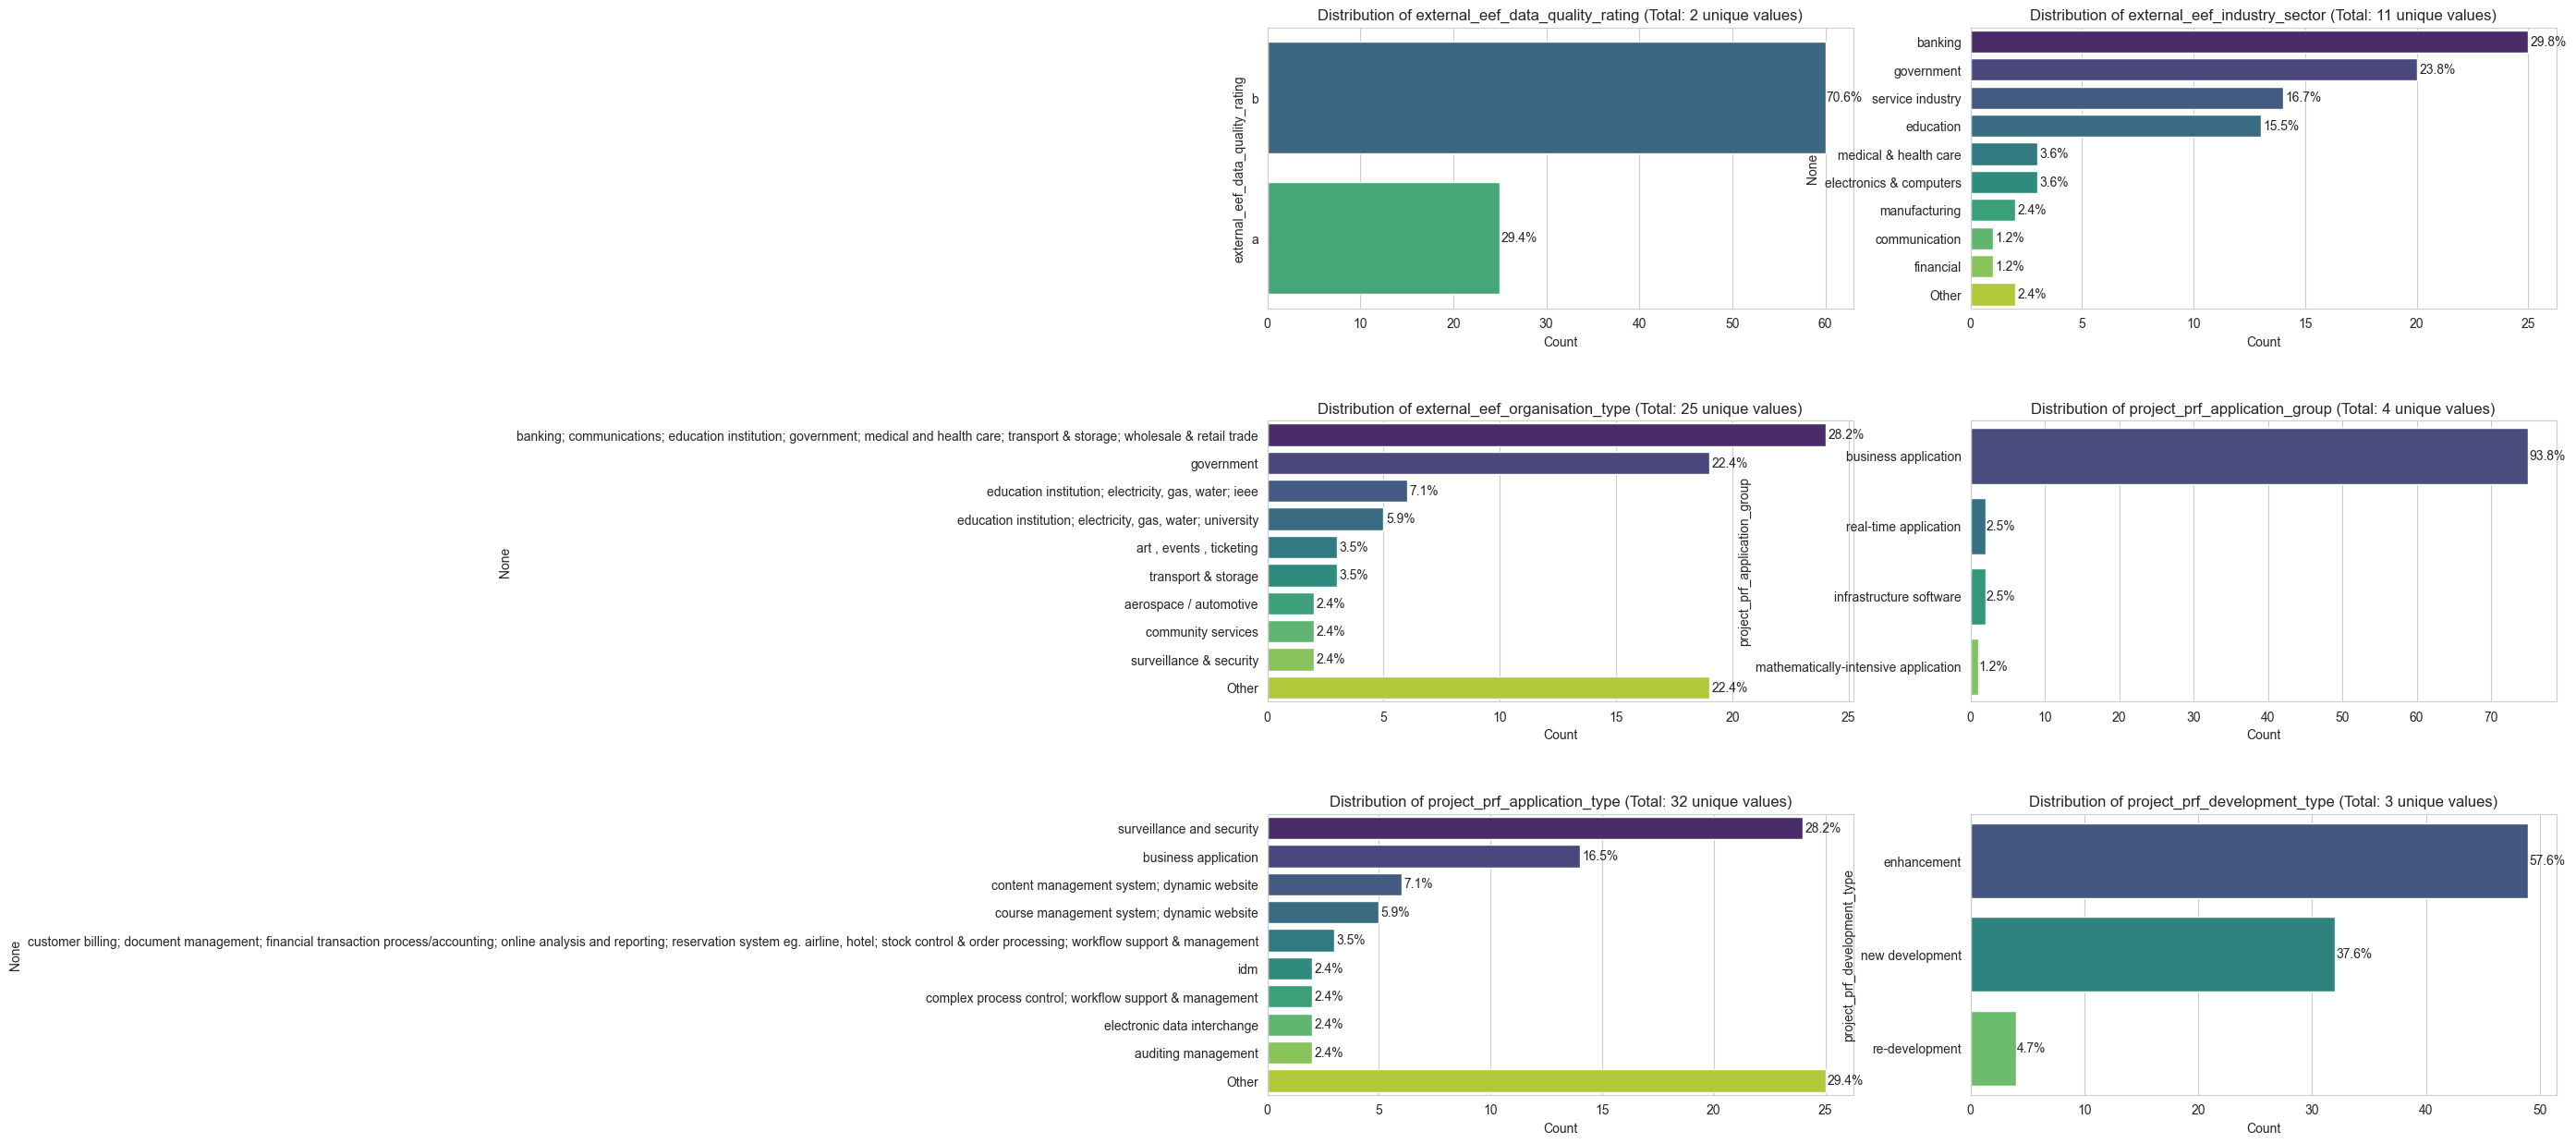

## Categorical-Numerical Relationships

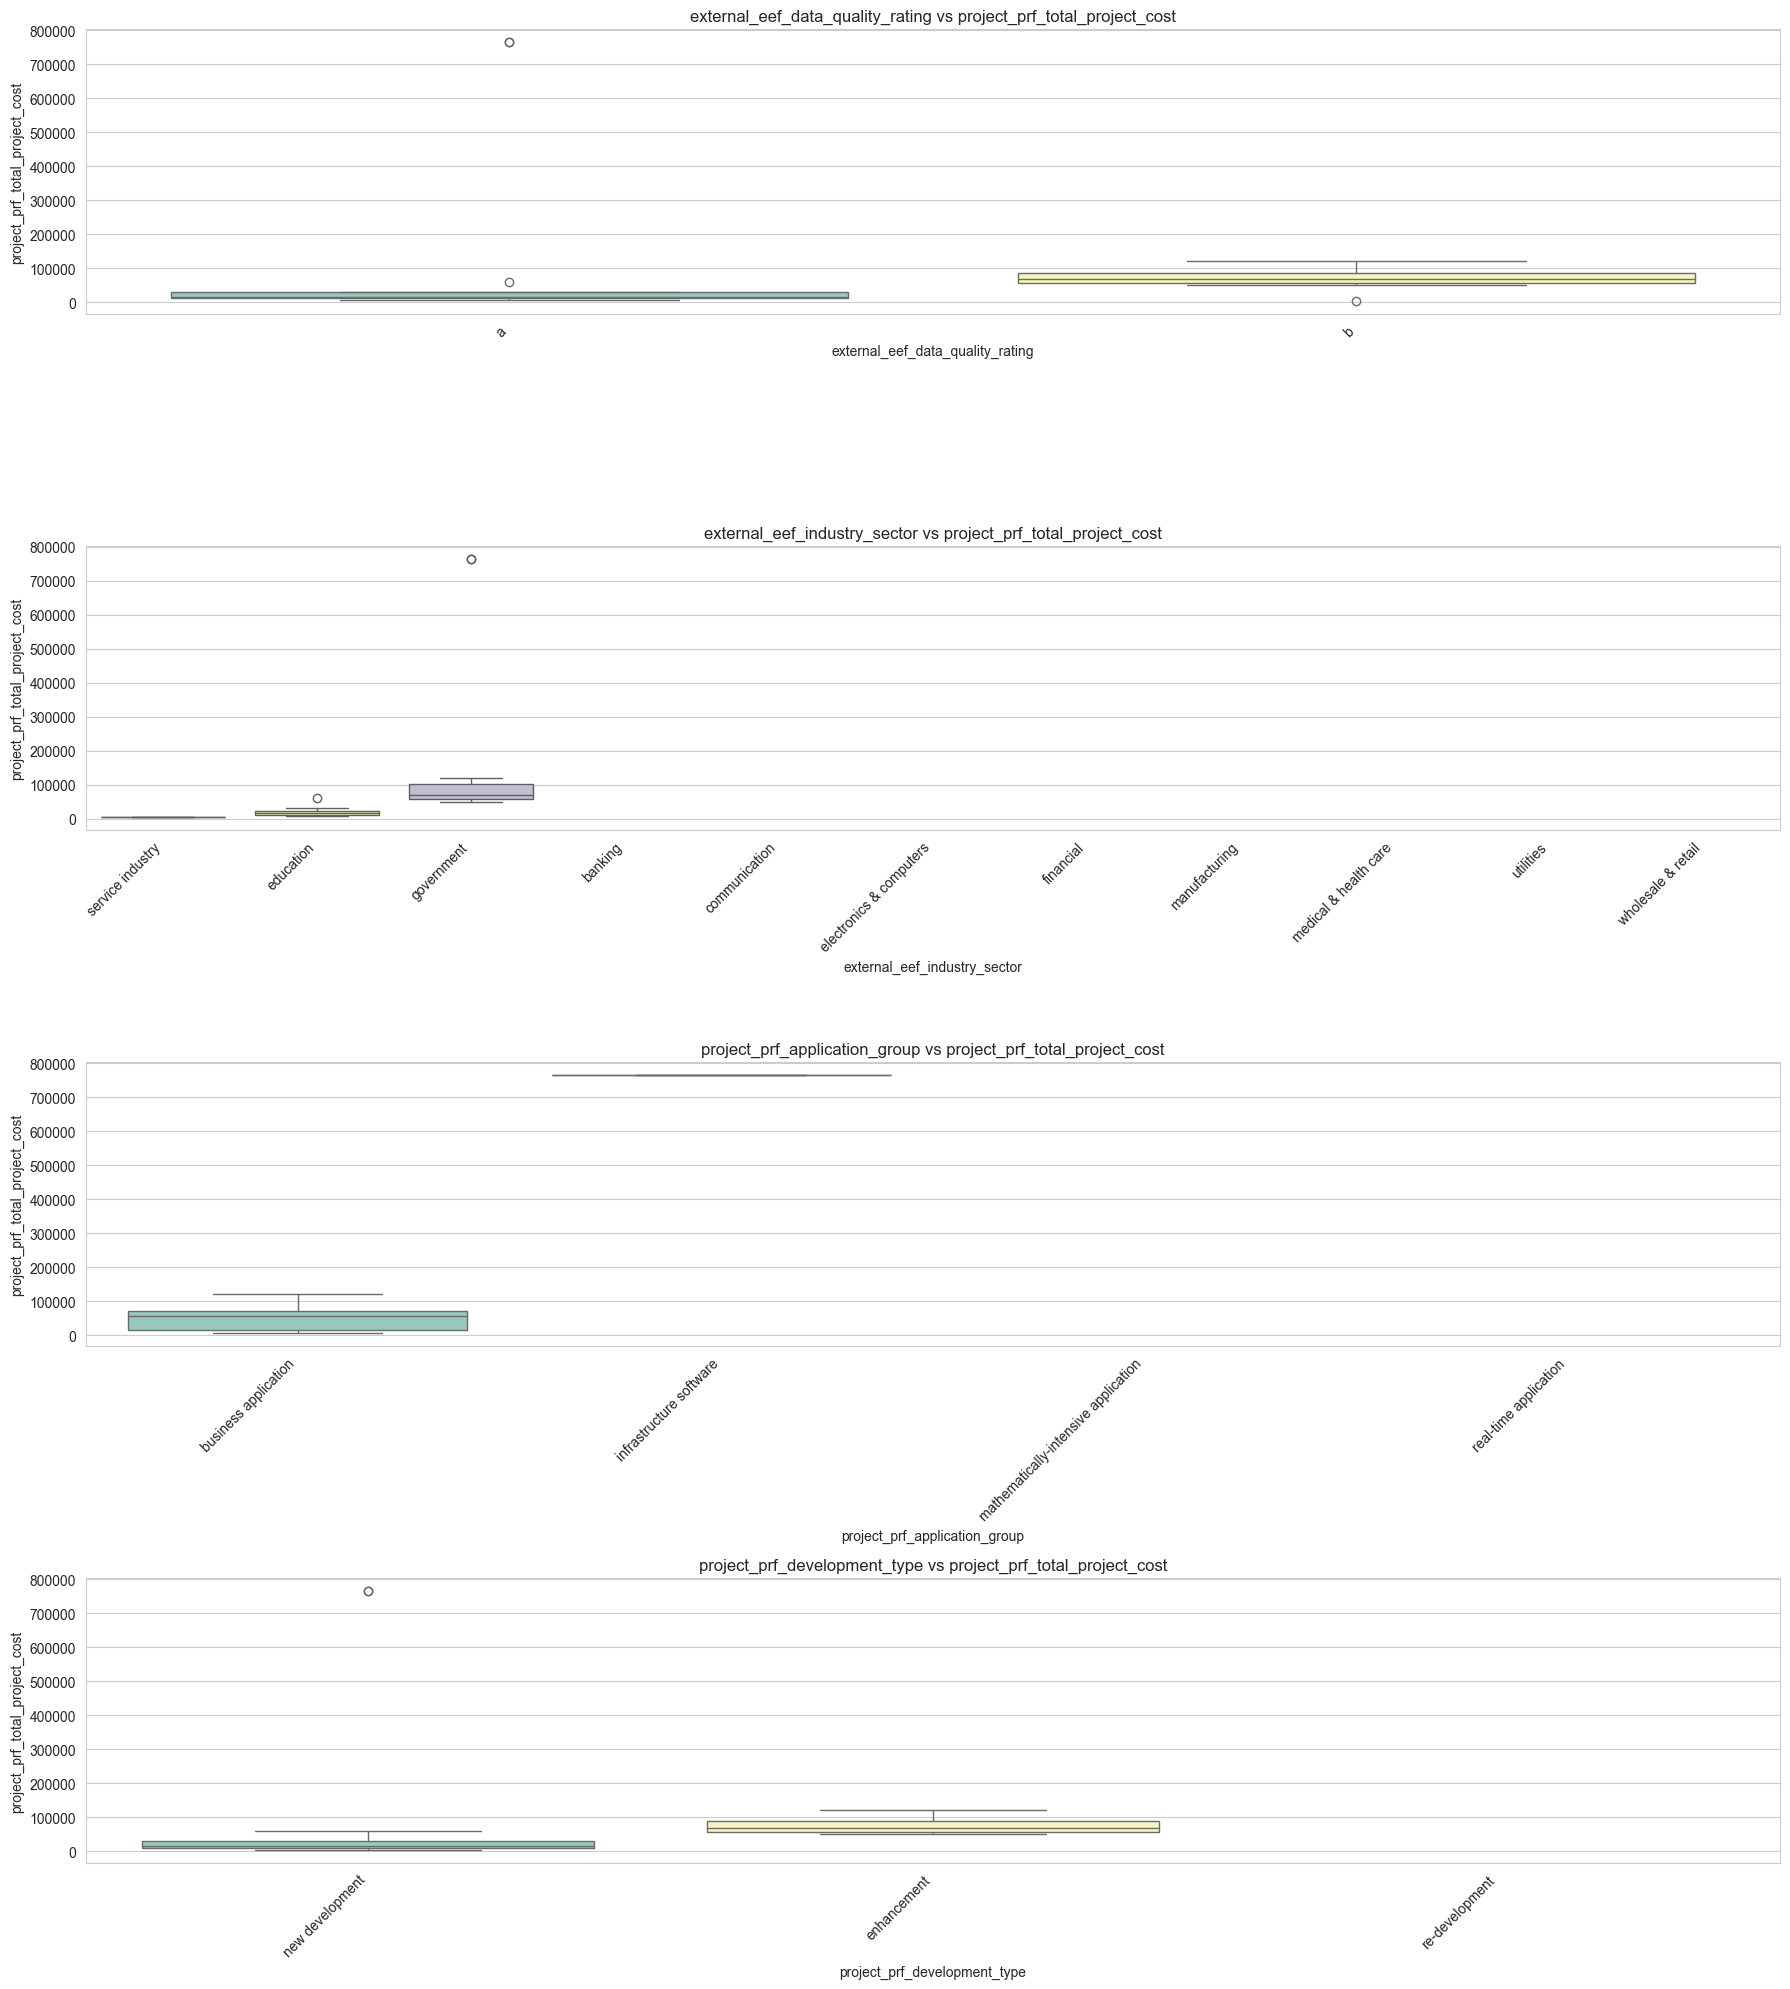

Cell executed at: 2025-05-24 19:09:51.416174


In [8]:
def display_header(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"# {text}"))
    except ImportError:
        print(f"\n=== {text} ===\n")

def display_subheader(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"## {text}"))
    except ImportError:
        print(f"\n-- {text} --\n")

def explore_data(df: pd.DataFrame) -> None:
    """
    Perform exploratory data analysis on the input DataFrame with nicely aligned plots.
    Args:
        df: Input DataFrame
    """
    from IPython.display import display

    display_header("Exploratory Data Analysis")
    
    # Data Overview
    display_subheader("Data Overview")
    print(f"Dataset shape: {df.shape}")
    if df.shape[0] > 20:
        print("First 5 rows:")
        display(df.head())
        print("Last 5 rows:")
        display(df.tail())
    else:
        display(df)
    
    # Duplicate Row Checking
    display_subheader("Duplicate Rows")
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Data Types and Memory Usage
    display_subheader("Data Types and Memory Usage")
    dtype_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Memory Usage (MB)': df.memory_usage(deep=True) / 1024 / 1024
    })
    display(dtype_info)
    
    # Unique Values Per Column
    display_subheader("Unique Values Per Column")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    
    # Type Conversion Suggestions
    display_subheader("Type Conversion Suggestions")
    potential_cat = [
        col for col in df.select_dtypes(include=['object']).columns
        if df[col].nunique() < max(30, 0.05*df.shape[0])
    ]
    if potential_cat:
        print("Consider converting to 'category' dtype for memory/performance:")
        print(potential_cat)
    else:
        print("No obvious candidates for 'category' dtype conversion.")
    
    # Summary Statistics
    display_subheader("Summary Statistics")
    try:
        display(df.describe(include='all').T.style.background_gradient(cmap='Blues', axis=1))
    except Exception:
        display(df.describe(include='all').T)
    
    # Missing Values
    display_subheader("Missing Values")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent.round(2)
    })
    if missing.sum() > 0:
        display(missing_info[missing_info['Missing Values'] > 0]
                .sort_values('Missing Values', ascending=False)
                .style.background_gradient(cmap='Reds'))
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        cols_with_missing = missing_info[missing_info['Missing Values'] > 0].index
        if len(cols_with_missing) > 0:
            sns.heatmap(df[cols_with_missing].isnull(), 
                        cmap='viridis', 
                        yticklabels=False, 
                        cbar_kws={'label': 'Missing Values'})
            plt.title('Missing Value Patterns')
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values in the dataset.")
    
    # Numerical Distributions
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if len(numerical_cols) > 0:
        display_subheader("Distribution of Numerical Features")
        sample_cols = numerical_cols[:min(12, len(numerical_cols))]
        num_cols = len(sample_cols)
        num_rows = (num_cols + 2) // 3  # 3 plots per row, rounded up
        fig = plt.figure(figsize=(18, num_rows * 4))
        grid = plt.GridSpec(num_rows, 3, figure=fig, hspace=0.4, wspace=0.3)
        for i, col in enumerate(sample_cols):
            row, col_pos = divmod(i, 3)
            ax = fig.add_subplot(grid[row, col_pos])
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue', alpha=0.7)
            mean_val = df[col].mean()
            median_val = df[col].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
            stats_text = (f"Std: {df[col].std():.2f}\n"
                          f"Min: {df[col].min():.2f}\n"
                          f"Max: {df[col].max():.2f}")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
                    verticalalignment='top', bbox=props)
            ax.set_title(f'Distribution of {col}')
            ax.legend(fontsize='small')
        plt.tight_layout()
        plt.show()
        # Correlation matrix and top correlations
        if len(numerical_cols) > 1:
            display_subheader("Correlation Matrix")
            corr = df[numerical_cols].corr().round(2)
            mask = np.triu(np.ones_like(corr, dtype=bool))
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
                        fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, 
                        annot_kws={"size": 10})
            plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
            # Top correlations
            if len(numerical_cols) > 5:
                corr_unstack = corr.unstack()
                corr_abs = corr_unstack.apply(abs)
                corr_abs = corr_abs[corr_abs < 1.0]
                highest_corrs = corr_abs.sort_values(ascending=False).head(15)
                display_subheader("Top Correlations")
                for (col1, col2), corr_val in highest_corrs.items():
                    actual_val = corr.loc[col1, col2]
                    print(f"{col1} ‚Äî {col2}: {actual_val:.2f}")
                pairs_to_plot = [(idx[0], idx[1]) for idx in highest_corrs.index][:6]
                if pairs_to_plot:
                    fig = plt.figure(figsize=(18, 12))
                    grid = plt.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
                    for i, (col1, col2) in enumerate(pairs_to_plot):
                        row, col_pos = divmod(i, 3)
                        ax = fig.add_subplot(grid[row, col_pos])
                        sns.regplot(x=df[col1], y=df[col2], ax=ax, scatter_kws={'alpha':0.5})
                        r_value = df[col1].corr(df[col2])
                        ax.set_title(f'{col1} vs {col2} (r = {r_value:.2f})')
                    plt.tight_layout()
                    plt.show()
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(categorical_cols) > 0:
        display_subheader("Categorical Features")
        sample_cat_cols = categorical_cols[:min(6, len(categorical_cols))]
        num_cat_cols = len(sample_cat_cols)
        num_cat_rows = (num_cat_cols + 1) // 2
        fig = plt.figure(figsize=(18, num_cat_rows * 5))
        grid = plt.GridSpec(num_cat_rows, 2, figure=fig, hspace=0.4, wspace=0.2)
        for i, col in enumerate(sample_cat_cols):
            row, col_pos = divmod(i, 2)
            ax = fig.add_subplot(grid[row, col_pos])
            value_counts = df[col].value_counts().sort_values(ascending=False)
            top_n = min(10, len(value_counts))
            if len(value_counts) > top_n:
                top_values = value_counts.head(top_n-1)
                other_count = value_counts.iloc[top_n-1:].sum()
                plot_data = pd.concat([top_values, pd.Series({'Other': other_count})])
            else:
                plot_data = value_counts
            sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {col} (Total: {len(value_counts)} unique values)')
            ax.set_xlabel('Count')
            total = plot_data.sum()
            for j, v in enumerate(plot_data.values):
                percentage = v / total * 100
                ax.text(v + 0.1, j, f'{percentage:.1f}%', va='center')
        plt.tight_layout()
        plt.show()
        # Categorical-numerical boxplots
        if numerical_cols and len(categorical_cols) > 0:
            display_subheader("Categorical-Numerical Relationships")
            numerical_variances = df[numerical_cols].var()
            target_numerical = numerical_variances.idxmax()
            sample_cat_for_box = [col for col in categorical_cols 
                                  if df[col].nunique() <= 15][:4]
            if sample_cat_for_box:
                fig = plt.figure(figsize=(18, 5 * len(sample_cat_for_box)))
                for i, cat_col in enumerate(sample_cat_for_box):
                    ax = fig.add_subplot(len(sample_cat_for_box), 1, i+1)
                    order = df.groupby(cat_col)[target_numerical].median().sort_values().index
                    sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax, 
                                order=order, palette='Set3')
                    ax.set_title(f'{cat_col} vs {target_numerical}')
                    ax.set_xlabel(cat_col)
                    ax.set_ylabel(target_numerical)
                    plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

# Exploratory Data Analysis
explore_data(df)


In [9]:
# Clean column names function
def clean_column_names(columns):
    cleaned_cols = []
    for col in columns:
        # First replace ampersands with _&_ to match PyCaret's transformation
        col_clean = col.replace(' & ', '_&_')
        # Then remove any remaining special chars
        col_clean = re.sub(r'[^\w\s&]', '', col_clean)
        # Finally replace spaces with underscores
        col_clean = col_clean.replace(' ', '_')
        cleaned_cols.append(col_clean)
    return cleaned_cols

# Clean column names
original_columns = df.columns.tolist()  # Save original column names for reference
df.columns = clean_column_names(df.columns)

Cell executed at: 2025-05-24 19:09:51.431291


In [10]:
# Create a mapping from original to cleaned column names
column_mapping = dict(zip(original_columns, df.columns))
print("\nColumn name mapping (original -> cleaned):")
for orig, clean in column_mapping.items():
    if orig != clean:  # Only show columns that changed
        print(f"  '{orig}' -> '{clean}'")



Column name mapping (original -> cleaned):
Cell executed at: 2025-05-24 19:09:51.447900


In [11]:
# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (85, 50)

First 5 rows:
   isbsg_project_id external_eef_data_quality_rating  \
0             10279                                b   
1             10317                                b   
2             10572                                b   
3             11278                                a   
4             11497                                b   

   project_prf_year_of_project external_eef_industry_sector  \
0                         2013                      banking   
1                         2015                   government   
2                         2014                   government   
3                         2010             service industry   
4                         2012                      banking   

                      external_eef_organisation_type  \
0  banking; communications; education institution...   
1                                         government   
2                                         government   
3                    

In [12]:
# Create a function to get comprehensive data summary
def get_data_summary(df, n_unique_samples=5):
    """
    Generate a comprehensive summary of the dataframe.
    
    Args:
        df: Pandas DataFrame
        n_unique_samples: Number of unique values to show as sample
        
    Returns:
        DataFrame with summary information
    """
    # Summary dataframe with basic info
    summary = pd.DataFrame({
        'Feature': df.columns,
        'data_type': df.dtypes.values,
        'Null_number': df.isnull().sum().values,
        'Null_pct': (df.isnull().mean() * 100).values,
        'Unique_counts': df.nunique().values,
        'unique_samples': [list(df[col].dropna().unique()[:n_unique_samples]) for col in df.columns]
    })
    
    return summary

# Generate and display data summary
summary_df = get_data_summary(df)
print("\nData Summary (first 10 columns):")
print(summary_df.head(10))



Data Summary (first 10 columns):
                            Feature data_type  Null_number   Null_pct  \
0                  isbsg_project_id     int64            0   0.000000   
1  external_eef_data_quality_rating    object            0   0.000000   
2       project_prf_year_of_project     int64            0   0.000000   
3      external_eef_industry_sector    object            1   1.176471   
4    external_eef_organisation_type    object            0   0.000000   
5     project_prf_application_group    object            5   5.882353   
6      project_prf_application_type    object            0   0.000000   
7      project_prf_development_type    object            0   0.000000   
8      tech_tf_development_platform    object           15  17.647059   
9             tech_tf_language_type    object            0   0.000000   

   Unique_counts                                     unique_samples  
0             84                [10279, 10317, 10572, 11278, 11497]  
1              2      

In [13]:
# Identify target column
target_col = 'project_prf_normalised_work_effort'
print(f"\nTarget variable: '{target_col}'")


Target variable: 'project_prf_normalised_work_effort'
Cell executed at: 2025-05-24 19:09:51.503102


[Back to top](#Index:)

<a id='part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [14]:
# Analyse missing values
print("\nAnalysing missing values...")
missing_pct = df.isnull().mean() * 100
missing_sorted = missing_pct.sort_values(ascending=False)
print("Top 10 columns with highest missing percentages:")
print(missing_sorted.head(10))


Analysing missing values...
Top 10 columns with highest missing percentages:
people_prf_it_experience_1_to_3_yr               100.000000
people_prf_it_experience_great_than_3_yr         100.000000
people_prf_it_experience_less_than_1_yr          100.000000
people_prf_project_user_involvement              100.000000
tech_tf_type_of_server                           100.000000
process_pmf_prototyping_used                      95.294118
people_prf_ba_team_experience_less_than_1_yr      84.705882
project_prf_case_tool_used                        83.529412
people_prf_ba_team_experience_great_than_3_yr     82.352941
people_prf_it_experience_great_than_9_yr          82.352941
dtype: float64
Cell executed at: 2025-05-24 19:09:51.511500


In [15]:
# Identify columns with high missing values (>70%)
high_missing_cols = missing_pct[missing_pct > 70].index.tolist()
print(f"\nColumns with >70% missing values ({len(high_missing_cols)} columns):")
for col in high_missing_cols[:5]:  # Show first 5
    print(f"  - {col}: {missing_pct[col]:.2f}% missing")
if len(high_missing_cols) > 5:
    print(f"  - ... and {len(high_missing_cols) - 5} more columns")


Columns with >70% missing values (16 columns):
  - project_prf_case_tool_used: 83.53% missing
  - process_pmf_prototyping_used: 95.29% missing
  - tech_tf_client_roles: 70.59% missing
  - tech_tf_type_of_server: 100.00% missing
  - people_prf_project_user_involvement: 100.00% missing
  - ... and 11 more columns
Cell executed at: 2025-05-24 19:09:51.527525


In [16]:
# Create a clean dataframe by dropping high-missing columns
df_clean = df.drop(columns=high_missing_cols)
print(f"\nData shape after dropping high-missing columns: {df_clean.shape}")
print(f"\nHigh missing columns got dropped are: {high_missing_cols}")

# Numerical columns
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical columns:")
print(num_cols)

# Categorical columns (object or category dtype)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:")
print(cat_cols)




Data shape after dropping high-missing columns: (85, 34)

High missing columns got dropped are: ['project_prf_case_tool_used', 'process_pmf_prototyping_used', 'tech_tf_client_roles', 'tech_tf_type_of_server', 'people_prf_project_user_involvement', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr', 'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'project_prf_currency_multiple']

Numerical columns:
['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_defect_density', 'project_prf_speed_of_delivery', 'project

In [17]:
# Handle remaining missing values
print("\nHandling remaining missing values...")


Handling remaining missing values...
Cell executed at: 2025-05-24 19:09:51.543960


In [18]:
# Fill missing values in categorical columns with "Missing"
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_clean[col].fillna('Missing', inplace=True)

Cell executed at: 2025-05-24 19:09:51.559921


In [19]:
# Check remaining missing values
remaining_missing = df_clean.isnull().sum()
remaining_missing_count = sum(remaining_missing > 0)
print(f"\nColumns with remaining missing values: {remaining_missing_count}")
if remaining_missing_count > 0:
    print("Top columns with missing values:")
    print(remaining_missing[remaining_missing > 0].sort_values(ascending=False).head())


Columns with remaining missing values: 12
Top columns with missing values:
project_prf_total_project_cost       57
project_prf_defect_density           55
people_prf_project_manage_changes    55
people_prf_personnel_changes         55
tech_tf_tools_used                   31
dtype: int64
Cell executed at: 2025-05-24 19:09:51.576043


In [20]:
# Verify target variable
print(f"\nTarget variable '{target_col}' summary:")
print(f"Unique values: {df_clean[target_col].nunique()}")
print(f"Missing values: {df_clean[target_col].isnull().sum()}")
print(f"Top value counts:")
print(df_clean[target_col].value_counts().head())



Target variable 'project_prf_normalised_work_effort' summary:
Unique values: 78
Missing values: 0
Top value counts:
project_prf_normalised_work_effort
47      4
225     2
1105    2
125     2
51      2
Name: count, dtype: int64
Cell executed at: 2025-05-24 19:09:51.579136


In [21]:
# Check for infinite values
inf_check = np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()
print(f"\nNumber of infinite values: {inf_check}")


Number of infinite values: 0
Cell executed at: 2025-05-24 19:09:51.595877


In [22]:
# Save cleaned data

file_name_no_ext

df_clean.to_csv(f"{data_folder}/{file_name_no_ext}_dropped.csv", index=False)
print(f'{data_folder}/{file_name_no_ext}_dropped.csv')


../data/ISBSG2016R1.1_Formatted4CSVAgileOnly_cleaned_dropped.csv
Cell executed at: 2025-05-24 19:09:51.605297


[Back to top](#Index:)

<a id='part3'></a>

# Part 3 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [23]:
# Identify categorical columns and check cardinality
print("\nCategorical columns and their cardinality:")
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols[:5]:  # Show first 5
    print(f"  {col}: {df_clean[col].nunique()} unique values")
if len(cat_cols) > 5:
    print(f"  ... and {len(cat_cols) - 5} more columns")


Categorical columns and their cardinality:
  external_eef_data_quality_rating: 2 unique values
  external_eef_industry_sector: 12 unique values
  external_eef_organisation_type: 25 unique values
  project_prf_application_group: 5 unique values
  project_prf_application_type: 32 unique values
  ... and 13 more columns
Cell executed at: 2025-05-24 19:09:51.621110


In [24]:
# One-hot encode categorical columns with low cardinality (<10 unique values)
low_card_cols = [col for col in cat_cols if df_clean[col].nunique() < 10]
print(f"\nWill apply one-hot encoding to {len(low_card_cols)} low-cardinality columns:")
for col in low_card_cols[:5]:  # Show first 5
    print(f"  - {col}")
if len(low_card_cols) > 5:
    print(f"  - ... and {len(low_card_cols) - 5} more columns")



Will apply one-hot encoding to 14 low-cardinality columns:
  - external_eef_data_quality_rating
  - project_prf_application_group
  - project_prf_development_type
  - tech_tf_development_platform
  - tech_tf_language_type
  - ... and 9 more columns
Cell executed at: 2025-05-24 19:09:51.636254


In [25]:
# Create encoded dataframe
df_encoded = pd.get_dummies(df_clean, columns=low_card_cols, drop_first=True)

encoded_columns = df_encoded.columns.tolist()
print(f"\nData shape after one-hot encoding: {df_encoded.shape}")
print("\nAll column names:")
print(df_encoded.columns.tolist())



Data shape after one-hot encoding: (85, 72)

All column names:
['isbsg_project_id', 'project_prf_year_of_project', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_type', 'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_defect_density', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_server_roles', 'tech_tf_tools_used', 'people_prf_project_manage_changes', 'people_prf_personnel_changes', 'project_prf_total_project_cost', 'external_eef_data_quality_rating_b', 'project_prf_application_group_business application', 'project_prf_application_group_infrastructure software', 'project_prf_application_group_mathematically-intensive application', 'project_prf_application_group_real-time application', 'project_prf_development_type_ne

In [26]:
# MANUALLY fix the problematic column names BEFORE PyCaret setup

# Function to fix the column names and prevent duplicates
def fix_column_names_no_duplicates(df):
    """Fix column names that cause issues with PyCaret while preventing duplicates."""
    original_cols = df.columns.tolist()
    fixed_columns = []
    
    # Track columns to check for duplicates
    seen_columns = set()
    
    for col in original_cols:
        # Replace spaces with underscores
        fixed_col = col.replace(' ', '_')
        # Replace ampersands 
        fixed_col = fixed_col.replace('&', 'and')
        # Remove any other problematic characters
        fixed_col = ''.join(c if c.isalnum() or c == '_' else '_' for c in fixed_col)
        
        # Handle duplicates by appending a suffix
        base_col = fixed_col
        suffix = 1
        while fixed_col in seen_columns:
            fixed_col = f"{base_col}_{suffix}"
            suffix += 1
        
        seen_columns.add(fixed_col)
        fixed_columns.append(fixed_col)
    
    # Create a new DataFrame with fixed column names
    df_fixed = df.copy()
    df_fixed.columns = fixed_columns
    
    # Print statistics about the renaming
    n_changed = sum(1 for old, new in zip(original_cols, fixed_columns) if old != new)
    print(f"Changed {n_changed} column names.")
    
    # Check for duplicates in the new column names
    dup_check = [item for item, count in pd.Series(fixed_columns).value_counts().items() if count > 1]
    if dup_check:
        print(f"WARNING: Found {len(dup_check)} duplicate column names after fixing: {dup_check}")
    else:
        print("No duplicate column names in the fixed DataFrame.")
    
    return df_fixed

# Show some of the original column names to help diagnose issues
print("\nSample of original column names:")
for i, col in enumerate(df_encoded.columns[:15]):  # Show first 15 for diagnosis
    print(f"{i}: {col}")

# Apply the fix to your dataframe
print("\nFixing column names for PyCaret compatibility...")
df_fixed = fix_column_names_no_duplicates(df_encoded)

encoded_columns_fixed = df_fixed.columns.tolist()

# Print some example fixed columns to verify
print("\nSample of fixed column names:")
for i, (old, new) in enumerate(zip(df_encoded.columns[:15], df_fixed.columns[:15])):
    print(f"Original: {old} -> Fixed: {new}")


Sample of original column names:
0: isbsg_project_id
1: project_prf_year_of_project
2: external_eef_industry_sector
3: external_eef_organisation_type
4: project_prf_application_type
5: project_prf_functional_size
6: project_prf_normalised_work_effort
7: project_prf_normalised_level_1_pdr_ufp
8: project_prf_normalised_pdr_ufp
9: project_prf_defect_density
10: project_prf_speed_of_delivery
11: project_prf_manpower_delivery_rate
12: project_prf_project_elapsed_time
13: project_prf_max_team_size
14: process_pmf_docs

Fixing column names for PyCaret compatibility...
Changed 29 column names.
No duplicate column names in the fixed DataFrame.

Sample of fixed column names:
Original: isbsg_project_id -> Fixed: isbsg_project_id
Original: project_prf_year_of_project -> Fixed: project_prf_year_of_project
Original: external_eef_industry_sector -> Fixed: external_eef_industry_sector
Original: external_eef_organisation_type -> Fixed: external_eef_organisation_type
Original: project_prf_application_t

In [27]:
# Save this DataFrame with fixed column names

df_fixed.to_csv(f'{data_folder}/{file_name_no_ext}_fixed_columns_data.csv', index=False)
print(f"Saved data with fixed column names to '{data_folder}/{file_name_no_ext}_fixed_columns_data.csv'")

Saved data with fixed column names to '../data/ISBSG2016R1.1_Formatted4CSVAgileOnly_cleaned_fixed_columns_data.csv'
Cell executed at: 2025-05-24 19:09:51.683446


In [28]:
# Create a diagnostic file with all column transformations
with open(f'{temp_folder}/column_transformations.txt', 'w') as f:
    f.write("Column name transformations:\n")
    f.write("--------------------------\n")
    for old, new in zip(df_encoded.columns, df_fixed.columns):
        f.write(f"{old} -> {new}\n")
print(f"Saved complete column transformations to '{temp_folder}/column_transformations.txt'")

Saved complete column transformations to '../temp/column_transformations.txt'
Cell executed at: 2025-05-24 19:09:51.698298


[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Data Profiling

xxx

In [29]:
# ## Data Profiling (Optional)

try:
    from ydata_profiling import ProfileReport
    
    print("\nGenerating data profile report...")
    profile = ProfileReport(df_clean, title="ISBSG Dataset Profiling Report", minimal=True)
    profile.to_file(f"{data_folder}/data_profile.html")
    print(f"Data profile report saved to '{data_folder}/data_profile.html'")
except ImportError:
    print("\nSkipping data profiling (ydata_profiling not installed)")
    print("To install: pip install ydata-profiling")


Skipping data profiling (ydata_profiling not installed)
To install: pip install ydata-profiling
Cell executed at: 2025-05-24 19:09:51.713271


[Back to top](#Index:)

<a id='part5'></a>

# Part 5 - PyCaret setup

xxx

In [30]:
print(sklearn.__version__)
print(pycaret.__version__)  

1.4.2
3.3.2
Cell executed at: 2025-05-24 19:09:51.716818


In [31]:
from pycaret.regression import setup, get_config
from sklearn.preprocessing import StandardScaler
import os

ignore_cols = ['isbsg_project_id', 'external_eef_data_quality_rating', 'external_eef_data_quality_rating_b', 'project_prf_normalised_work_effort_level_1', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 
               'project_prf_project_elapsed_time', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 
               'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr', 
               'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 
               'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'project_prf_total_project_cost', 
               'project_prf_cost_currency', 'project_prf_currency_multiple', 'project_prf_speed_of_delivery', 'people_prf_project_manage_changes', 
               'project_prf_defect_density','project_prf_manpower_delivery_rate'
            ]

print(f"Final encoded feature list: {encoded_columns_fixed}")
print(f"\nIgnred feature columns: {ignore_cols}")
setup_results = setup(
    data=df_fixed,
    target=target_col,
    ignore_features=ignore_cols,
    session_id=123,
    preprocess=True,
    # Add these lines to enable normalization (scaling)
    normalize=True,             # This will use StandardScaler (Z-score normalization) by default
    normalize_method='zscore',  # Explicitly state 'zscore', or choose 'minmax', 'maxabs', 'robust'
    verbose=False
)

# Get the fitted pipeline from PyCaret
preprocessor = get_config('pipeline')

# --- Capture the scaler model ---
# Access the 'normalize' step from the pipeline's named_steps
# The actual scaler object is inside the 'transformer' attribute of the TransformerWrapper
scaler_model = preprocessor.named_steps['normalize'].transformer

# Create the models folder if it doesn't exist
if not os.path.exists(models_folder):
    os.makedirs(models_folder)
    print(f"Created folder: {models_folder}")

# Define the file path for the scaler model
scaler_filename = os.path.join(models_folder, 'standard_scaler.pkl') # .pkl is a common extension for pickled files

# Create the models folder if it doesn't exist
if not os.path.exists(models_folder):
    os.makedirs(models_folder)
    print(f"Created folder: {models_folder}")

# Save the scaler model
joblib.dump(scaler_model, scaler_filename)
print(f"Scaler model saved to: {scaler_filename}")

# You can now print it to verify
print(scaler_model)

# You can also check its type
print(type(scaler_model))

# If it's a StandardScaler, it will have .mean_ and .scale_ attributes after fitting
if isinstance(scaler_model, StandardScaler):
    print(f"Scaler Mean: {scaler_model.mean_}")
    print(f"Scaler Scale (Std Dev): {scaler_model.scale_}")

# --- Example of using the captured scaler (on new data, assuming it's in the same format) ---
# Note: You typically use the entire PyCaret pipeline for new data,
# but if you specifically needed just the scaler for some custom preprocessing,
# you could do it like this:
#
# # Assuming 'new_numerical_data' is a pandas DataFrame or numpy array
# # containing only the numerical features that were scaled by PyCaret
# # (i.e., 'project_prf_year_of_project', 'project_prf_functional_size', etc.)
# scaled_data_custom = scaler_model.transform(new_numerical_data)
# print(scaled_data_custom)




Final encoded feature list: ['isbsg_project_id', 'project_prf_year_of_project', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_type', 'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_defect_density', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_server_roles', 'tech_tf_tools_used', 'people_prf_project_manage_changes', 'people_prf_personnel_changes', 'project_prf_total_project_cost', 'external_eef_data_quality_rating_b', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_real_time_application', 'project_prf_development_type_new_development', 'project_prf_develop

[Back to top](#Index:)

<a id='part6'></a>

# Part 6 - Feature Correlation Analysis

xxx


Analyzing feature correlations...
Analysing correlations among 6 numeric features


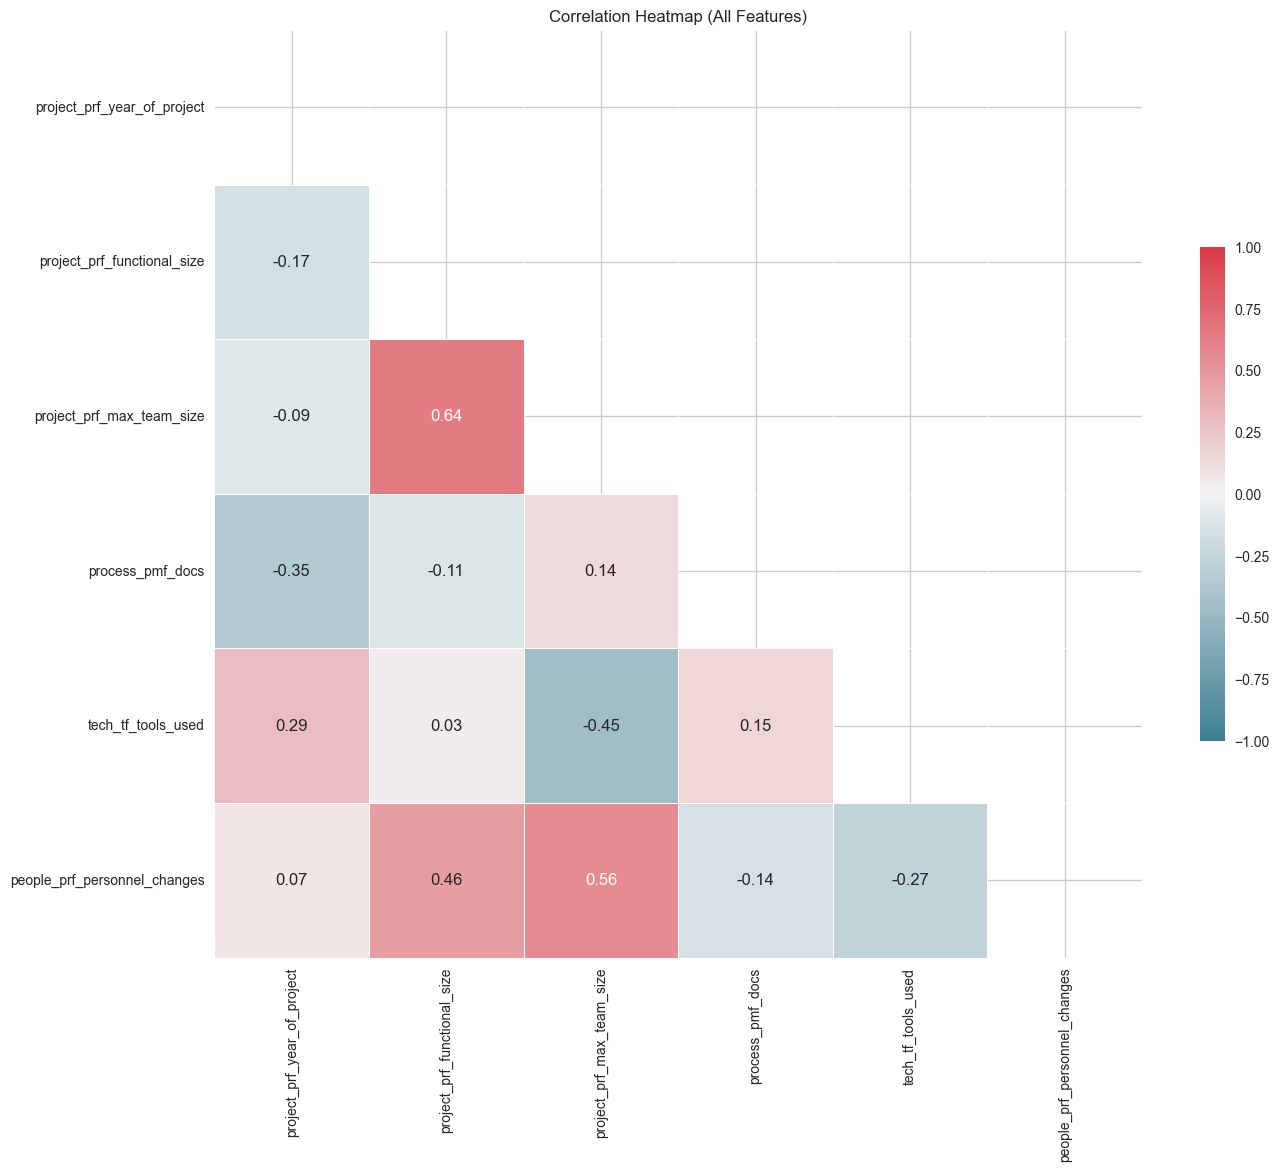

Correlation heatmap saved as plots/correlation_heatmap.png


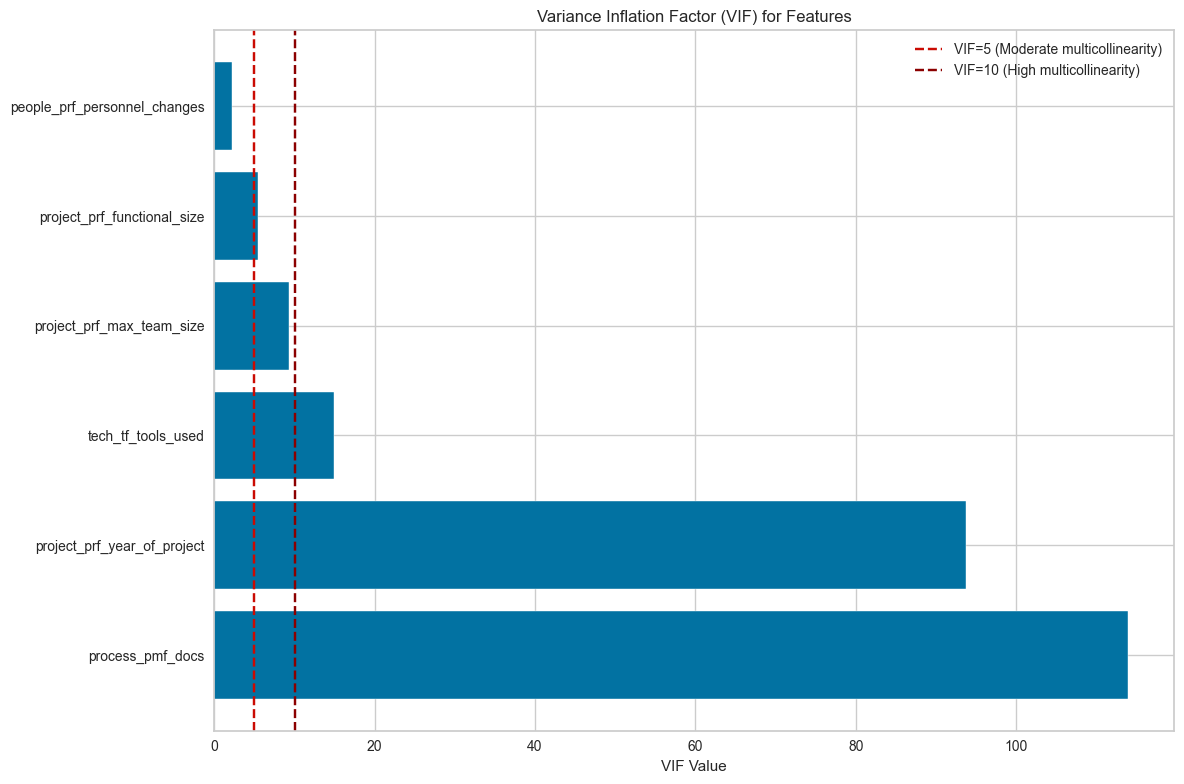

VIF values plot saved as ../plots/vif_values.png

Found 0 feature pairs with correlation > 0.7:

Features with high VIF (> 10):
  ‚Ä¢ process_pmf_docs: 114.00
  ‚Ä¢ project_prf_year_of_project: 93.80
  ‚Ä¢ tech_tf_tools_used: 14.96

--- Multicollinearity Analysis Recommendations ---
No significant multicollinearity detected based on correlation analysis.

Based on VIF analysis, consider removing or transforming these features with high VIF values.
Cell executed at: 2025-05-24 19:09:58.965241


In [32]:
# Feature correlation analysis
print("\nAnalyzing feature correlations...")
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from pycaret.regression import get_config

    # Create directory for plots
    os.makedirs(plots_folder, exist_ok=True)

    # Get data from PyCaret
    X = get_config('X')

    # Ensure we're working with numeric data only
    X_numeric = X.select_dtypes(include=[np.number])

    # Drop rows with NaN or Inf values before correlation and VIF analysis
    X_numeric_clean = X_numeric.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')

    # Get number of features
    n_features = X_numeric_clean.shape[1]
    print(f"Analysing correlations among {n_features} numeric features")

    # Calculate correlation matrix
    corr_matrix = X_numeric_clean.corr()

    # Determine features with high correlation
    correlation_threshold = 0.7
    high_corr_pairs = []

    # Find highly correlated feature pairs
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                high_corr_pairs.append((
                    X_numeric_clean.columns[i],
                    X_numeric_clean.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(corr_matrix)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # If there are too many features, show only the ones with high correlation
    if n_features > 20:
        print(f"Large number of features detected ({n_features}). Creating filtered correlation matrix.")
        # Get list of features with high correlation
        high_corr_features = set()
        for feat1, feat2, _ in high_corr_pairs:
            high_corr_features.add(feat1)
            high_corr_features.add(feat2)

        # If there are high correlations, show only those features
        if high_corr_features:
            high_corr_features = list(high_corr_features)
            filtered_corr = corr_matrix.loc[high_corr_features, high_corr_features]

            # Plot filtered heatmap
            sns.heatmap(filtered_corr, mask=np.triu(filtered_corr),
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5},
                        annot=True, fmt=".2f")
            plt.title('Correlation Heatmap (Filtered to Highly Correlated Features)')
        else:
            # No high correlations, show full matrix
            sns.heatmap(corr_matrix, mask=mask,
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
            plt.title('Correlation Heatmap (All Features)')
    else:
        # For smaller feature sets, show the full correlation matrix
        sns.heatmap(corr_matrix, mask=mask,
                    cmap=cmap, vmax=1, vmin=-1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                    annot=True, fmt=".2f")
        plt.title('Correlation Heatmap (All Features)')

    plt.tight_layout()
    plt.savefig(f"{plots_folder}/correlation_heatmap.png")
    plt.show()      # <-- Show in notebook
    plt.close()
    print("Correlation heatmap saved as plots/correlation_heatmap.png")

    # Calculate Variance Inflation Factor (VIF) if there are enough samples
    vif_data = None
    if X_numeric_clean.shape[0] > X_numeric_clean.shape[1]:
        try:
            from statsmodels.stats.outliers_influence import variance_inflation_factor

            # Calculate VIF for each feature
            vif_data = pd.DataFrame()
            vif_data["Feature"] = X_numeric_clean.columns
            vif_data["VIF"] = [variance_inflation_factor(X_numeric_clean.values, i)
                               for i in range(X_numeric_clean.shape[1])]

            # Sort by VIF value
            vif_data = vif_data.sort_values("VIF", ascending=False)

            # Plot VIF values
            plt.figure(figsize=(12, 8))
            plt.barh(vif_data["Feature"], vif_data["VIF"])
            plt.axvline(x=5, color='r', linestyle='--', label='VIF=5 (Moderate multicollinearity)')
            plt.axvline(x=10, color='darkred', linestyle='--', label='VIF=10 (High multicollinearity)')
            plt.xlabel('VIF Value')
            plt.title('Variance Inflation Factor (VIF) for Features')
            plt.legend()
            plt.tight_layout()
            plt.savefig(f"{plots_folder}/vif_values.png")
            plt.show()      # <-- Show in notebook
            plt.close()
            print(f"VIF values plot saved as {plots_folder}/vif_values.png")
        except Exception as vif_err:
            print(f"Could not calculate VIF: {vif_err}")
    else:
        print("Not enough samples to calculate VIF (need more samples than features)")

    # Print results
    print(f"\nFound {len(high_corr_pairs)} feature pairs with correlation > {correlation_threshold}:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  ‚Ä¢ {feat1} and {feat2}: {corr:.4f}")

    # Print VIF results if available
    if vif_data is not None:
        high_vif_threshold = 10
        high_vif_features = vif_data[vif_data["VIF"] > high_vif_threshold]
        if not high_vif_features.empty:
            print(f"\nFeatures with high VIF (> {high_vif_threshold}):")
            for _, row in high_vif_features.iterrows():
                print(f"  ‚Ä¢ {row['Feature']}: {row['VIF']:.2f}")
        else:
            print(f"\nNo features have VIF > {high_vif_threshold}")

    # Recommendations based on analysis
    print("\n--- Multicollinearity Analysis Recommendations ---")
    if high_corr_pairs:
        print("Consider addressing multicollinearity by:")
        print("1. Removing one feature from each highly correlated pair")
        print("2. Creating new features by combining correlated features")
        print("3. Applying dimensionality reduction techniques like PCA")

        # Identify top candidates for removal
        if len(high_corr_pairs) > 0:
            print("\nPotential candidates for removal:")
            # Count frequency of each feature in high correlation pairs
            freq = {}
            for feat1, feat2, _ in high_corr_pairs:
                freq[feat1] = freq.get(feat1, 0) + 1
                freq[feat2] = freq.get(feat2, 0) + 1

            # Features that appear most frequently in high correlation pairs
            freq_df = pd.DataFrame({'Feature': list(freq.keys()),
                                    'Frequency in high corr pairs': list(freq.values())})
            freq_df = freq_df.sort_values('Frequency in high corr pairs', ascending=False)

            for _, row in freq_df.head(5).iterrows():
                print(f"  ‚Ä¢ {row['Feature']} (appears in {row['Frequency in high corr pairs']} high correlation pairs)")
    else:
        print("No significant multicollinearity detected based on correlation analysis.")

    if vif_data is not None and not high_vif_features.empty:
        print("\nBased on VIF analysis, consider removing or transforming these features with high VIF values.")

except Exception as e:
    print(f"Feature correlation analysis failed: {e}")


[Back to top](#Index:)

<a id='part7'></a>

# Part 7 - Model Building with PyCaret

xxx

In [33]:
from pycaret.regression import get_config, compare_models, pull, tune_model, evaluate_model, save_model

import time

# Start timing
start_time = time.time()

# Create output directories if needed
os.makedirs(data_folder, exist_ok=True)
os.makedirs(models_folder, exist_ok=True)
os.makedirs(logs_folder, exist_ok=True)


# Get preprocessed data for inspection and saving
X = get_config("X")
y = get_config("y")

# Print all feature names ---
print("All preprocessed feature names (as list):", X.columns.tolist())

X.to_csv(f"{data_folder}/pycaret_processed_features.csv", index=False)
y.to_csv(f"{data_folder}/pycaret_processed_target.csv", index=False)
print(f"\nPreprocessed data shape: {X.shape}")
print(f"Numeric features: {len(X.select_dtypes(include=[float, int]).columns)}")
print(f"Categorical features: {len(X.select_dtypes(include=['object', 'category']).columns)}")
print("Preprocessed features and target saved.")


# 1. Compare and select top 3 models (returns list of models)
print("\nComparing regression models and selecting top 3...")
top_models = compare_models(n_select=3)
model_results = pull()
model_results.to_csv(f"{logs_folder}/model_comparison_results.csv")
print("\nModel comparison results:")
print(model_results)

# 2. For each top model: tune, evaluate, and save
tuned_models = []
scores = []

for i, model in enumerate(top_models, 1):
    model_name = type(model).__name__
    print(f"\nModel {i}: {model_name}")
    
    # Tune
    print("  Tuning...")
    tuned = tune_model(model, n_iter=10)
    tuned_models.append(tuned)

    # Pull results after tuning - get the mean values
    tuned_results = pull()
    tuned_results.to_csv(f'{logs_folder}/tuned_results_model_{i}_{model_name}.csv')
    
    # Extract metrics from "Mean" column instead of "Value"
    try:
        # First try to access by 'Mean' column which is the typical format
        scores.append({
            'Model': model_name, 
            'MAE': tuned_results.loc['MAE', 'Mean'],
            'RMSE': tuned_results.loc['RMSE', 'Mean'],
            'R2': tuned_results.loc['R2', 'Mean']
        })
    except KeyError:
        # As a fallback, check the structure of tuned_results
        print(f"  Warning: Expected column structure not found in tuned results")
        print(f"  tuned_results columns: {tuned_results.columns}")
        print(f"  tuned_results index: {tuned_results.index}")
        
        # Try alternative approaches based on the actual structure
        if 'Mean' in tuned_results.columns:
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', 'Mean'] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', 'Mean'] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', 'Mean'] if 'R2' in tuned_results.index else None
            })
        elif len(tuned_results.columns) > 0:
            # Get the last column as it might contain mean values
            last_col = tuned_results.columns[-1]
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', last_col] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', last_col] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', last_col] if 'R2' in tuned_results.index else None
            })
        else:
            # If we still can't find the right structure, log the issue
            scores.append({
                'Model': model_name,
                'MAE': None,
                'RMSE': None,
                'R2': None
            })
            print(f"  Unable to extract metrics for {model_name}. Check the saved CSV for details.")
    
    # Save tuned model
    save_model(tuned, f"{models_folder}/top_model_{i}_{model_name}")
    print(f"  Saved as {models_folder}/top_model_{i}_{model_name}.pkl")
    print(f"  Time elapsed: {time.time() - start_time:.1f} seconds")


# Save overall summary of all tuned models
score_df = pd.DataFrame(scores)
score_df.to_csv(f"{logs_folder}/tuned_model_scores.csv", index=False)
print("\nTuned models summary:\n", score_df)
print("\nAll top 3 models have been tuned, evaluated, and saved.")
print("\nAnalysis complete! Proceed with feature importance or SHAP analysis as next steps.")

# 3. Optionally: Pull the best model for additional analysis (feature importance, SHAP, etc.)
# You can access the best model as top_models[0] or reload any saved model later



All preprocessed feature names (as list): ['project_prf_year_of_project', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_type', 'project_prf_functional_size', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_server_roles', 'tech_tf_tools_used', 'people_prf_personnel_changes', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_real_time_application', 'project_prf_development_type_new_development', 'project_prf_development_type_re_development', 'tech_tf_development_platform_mr', 'tech_tf_development_platform_multi', 'tech_tf_development_platform_pc', 'tech_tf_development_platform_proprietary', 'tech_tf_language_type_4GL', 'tech_tf_language_type_5GL', 'tech_tf_primary_programming_language_abap', 'tech_tf_primary_programming_language_c_', 'tech_tf_primary_programming_language_c__


Model comparison results:
                              Model           MAE           MSE          RMSE  \
dt          Decision Tree Regressor  1.537217e+03  3.158885e+07  3.067367e+03   
knn           K Neighbors Regressor  2.456940e+03  7.581950e+07  5.097461e+03   
gbr     Gradient Boosting Regressor  1.675733e+03  4.525845e+07  3.520833e+03   
rf          Random Forest Regressor  1.887133e+03  5.344106e+07  4.030721e+03   
ada              AdaBoost Regressor  2.255833e+03  5.745020e+07  4.219890e+03   
et            Extra Trees Regressor  1.963993e+03  5.493021e+07  4.162583e+03   
en                      Elastic Net  2.005905e+03  5.596754e+07  4.144577e+03   
par    Passive Aggressive Regressor  1.965654e+03  5.554759e+07  4.114538e+03   
huber               Huber Regressor  1.961806e+03  5.536731e+07  4.115577e+03   
ridge              Ridge Regression  1.965146e+03  5.513099e+07  4.114274e+03   
br                   Bayesian Ridge  1.994175e+03  5.543989e+07  4.181780e+03   
o

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Transformation Pipeline and Model Successfully Saved
  Saved as ../models/top_model_1_DecisionTreeRegressor.pkl
  Time elapsed: 26.4 seconds

Model 2: KNeighborsRegressor
  Tuning...


Fitting 10 folds for each of 10 candidates, totalling 100 fits
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Transformation Pipeline and Model Successfully Saved
  Saved as ../models/top_model_2_KNeighborsRegressor.pkl
  Time elapsed: 31.5 seconds

Model 3: GradientBoostingRegressor
  Tuning...


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Transformation Pipeline and Model Successfully Saved
  Saved as ../models/top_model_3_GradientBoostingRegressor.pkl
  Time elapsed: 40.9 seconds

Tuned models summary:
                        Model   MAE  RMSE    R2
0      DecisionTreeRegressor  None  None  None
1        KNeighborsRegressor  None  None  None
2  GradientBoostingRegressor  None  None  None

All top 3 models have been tuned, evaluated, and saved.

Analysis complete! Proceed with feature importance or SHAP analysis as next steps.
Cell executed at: 2025-05-24 19:10:39.873632


[Back to top](#Index:)

<a id='part8'></a>

# Part 8 - Feature Importance

xxx

In [34]:
# Only some models (e.g., tree-based models like Random Forest, XGBoost, LightGBM) have feature_importances_.
# Many linear models (like LinearRegression, Lasso), KNN, and some ensemble models do not.

# print(type(tuned_model))

for i, m in enumerate(tuned_models, 1):
    print(f"Model {i} type: {type(m)}")



Model 1 type: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Model 2 type: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
Model 3 type: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Cell executed at: 2025-05-24 19:10:39.894532


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd

def plot_linear_feature_importance(model, X, y, feature_names=None, method='coefficients'):
    """
    Plot feature importance for Linear models
    
    Parameters:
    -----------
    model : trained linear model
    X : feature matrix
    y : target vector
    feature_names : list of feature names (optional)
    method : 'coefficients' or 'permutation'
    """
    
    # Create directory for plots if it doesn't exist
    import os
    os.makedirs(plots_folder, exist_ok=True)
    
    # Get feature names if not provided
    if feature_names is None:
        if hasattr(X, 'columns'):  # If X is a DataFrame
            feature_names = X.columns.tolist()
        else:
            feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    
    plt.figure(figsize=(10, 6))
    
    if method == 'coefficients':
        # Use absolute coefficient values as feature importance
        importances = np.abs(model.coef_)
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Coefficient Magnitude')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Absolute Coefficient Magnitude')
        
    elif method == 'permutation':
        # Calculate permutation importance
        result = permutation_importance(
            model, X, y, n_repeats=10, random_state=42, n_jobs=-1
        )
        
        importances = result.importances_mean
        std = result.importances_std
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Permutation Importance')
        plt.barh(range(len(indices)), importances[indices], xerr=std[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Permutation Importance')
    
    plt.tight_layout()
    plt.savefig(f'{plots_folder}/linear_feature_importance_{method}.png')
    print(f'Feature importance plot saved to {plots_folder}/linear_feature_importance_{method}.png')
    
    # Return the importances for potential further analysis
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    return importance_df

# Example usage:
# plot_linear_feature_importance(linear_model, X, y, feature_names=X.columns, method='coefficients')
# plot_linear_feature_importance(linear_model, X, y, feature_names=X.columns, method='permutation')

Cell executed at: 2025-05-24 19:10:39.921495


All features: ['project_prf_year_of_project', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_type', 'project_prf_functional_size', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_server_roles', 'tech_tf_tools_used', 'people_prf_personnel_changes', 'project_prf_application_group_business_application', 'project_prf_application_group_infrastructure_software', 'project_prf_application_group_mathematically_intensive_application', 'project_prf_application_group_real_time_application', 'project_prf_development_type_new_development', 'project_prf_development_type_re_development', 'tech_tf_development_platform_mr', 'tech_tf_development_platform_multi', 'tech_tf_development_platform_pc', 'tech_tf_development_platform_proprietary', 'tech_tf_language_type_4GL', 'tech_tf_language_type_5GL', 'tech_tf_primary_programming_language_abap', 'tech_tf_primary_programming_language_c_', 'tech_tf_primary_programming_language_c__', 'tech_tf_primary_programm

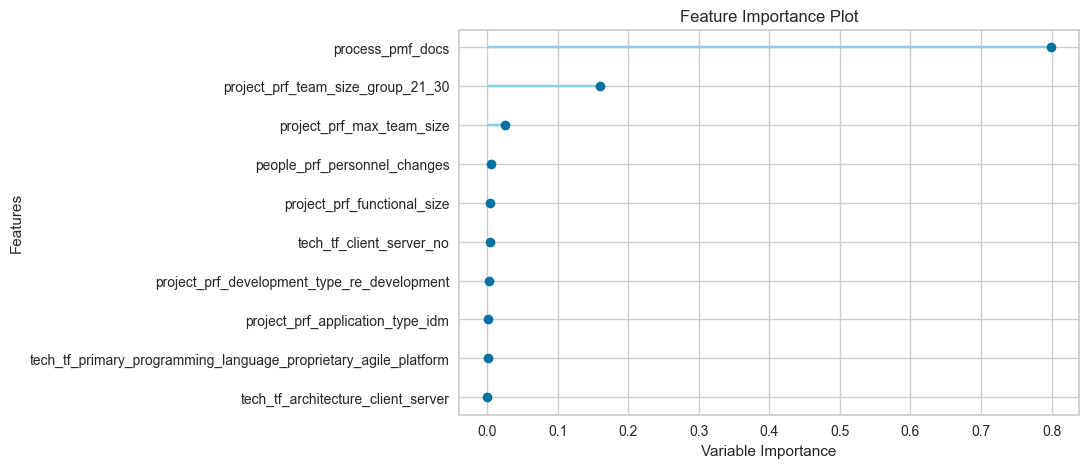

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/feature_importance_model_1_DecisionTreeRegressor.png

Model 2: KNeighborsRegressor
  PyCaret plot_model failed: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.
  This model does not support .coef_ or is not a linear model.

Model 3: GradientBoostingRegressor


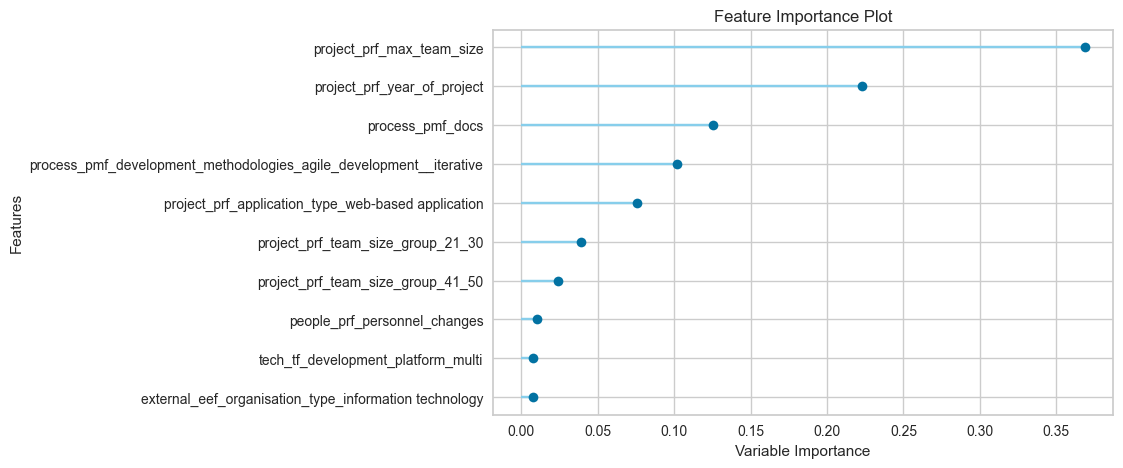

<Figure size 800x550 with 0 Axes>

  PyCaret feature importance plot saved to ../plots/feature_importance_model_3_GradientBoostingRegressor.png
Cell executed at: 2025-05-24 19:10:40.973541


In [36]:
# code modified for top 3 models

from pycaret.regression import plot_model
import os
import matplotlib.pyplot as plt

pycaret_X=X
pycaret_y = y

os.makedirs(plots_folder, exist_ok=True)
feature_names = pycaret_X.columns.tolist()  # Make sure to use the same data as in training
print(f"All features: {feature_names}")


for i, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {i}: {model_name}")

    # First try PyCaret's plot_model
    try:
        plot_model(tuned_model, plot='feature', save=False)
        plt.savefig(f'{plots_folder}/feature_importance_model_{i}_{model_name}.png')
        plt.show()
        plt.close()
        print(f"  PyCaret feature importance plot saved to {plots_folder}/feature_importance_model_{i}_{model_name}.png")
    except Exception as e:
        print(f"  PyCaret plot_model failed: {e}")
        # Fallback for linear models with coefficients
        try:
            # If it's a linear model (like HuberRegressor, LinearRegression, etc.)
            if hasattr(tuned_model, 'coef_'):
                importance_df = plot_linear_feature_importance(
                    tuned_model, pycaret_X, pycaret_y, 
                    feature_names=feature_names, 
                    method='coefficients'
                )
                print("  Custom coefficient-based feature importance plot saved.")
                print("  All important features:")
                print(importance_df)
            else:
                print("  This model does not support .coef_ or is not a linear model.")
        except Exception as e2:
            print(f"  Could not generate feature plot for linear model: {e2}")

    # Optionally: also plot permutation-based feature importance for all linear models
    if hasattr(tuned_model, 'coef_'):
        print("\n  Generating permutation-based feature importance plot...")
        try:
            importance_df_perm = plot_linear_feature_importance(
                tuned_model, pycaret_X, pycaret_y, 
                feature_names=feature_names, 
                method='permutation'
            )
            print("  Allimportant features (permutation):")
            print(importance_df_perm)
        except Exception as e:
            print(f"  Could not generate permutation feature plot: {e}")


[Back to top](#Index:)

<a id='part9'></a>

# Part 9 - SHAP Analysis

xxx

In [37]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Check if required packages are installed and install if needed
def check_and_install_packages():
    try:
        import shap
        from pycaret.regression import get_config
        print("All required packages are installed.")
        return True
    except ImportError as e:
        missing_package = str(e).split("'")[1]
        print(f"Missing package: {missing_package}")
        install = input(f"Would you like to install {missing_package}? (y/n): ")
        if install.lower() == 'y':
            import sys
            import subprocess
            subprocess.check_call([sys.executable, "-m", "pip", "install", missing_package])
            print(f"{missing_package} installed successfully.")
            return True
        else:
            print(f"Please install {missing_package} to proceed.")
            return False

Cell executed at: 2025-05-24 19:10:40.995845


In [38]:
# SHAP analysis with proper data type handling and debugging
"""
Global Perspective:
- Summary Plot: Provides a global overview of feature importance and their 
  positive or negative impact on the model output across the entire dataset.
- Dependence Plot: Illustrates the relationship between a single feature's 
  value and its SHAP value across all instances to understand its general 
  effect on the prediction.
- Bar Chart: Shows the global importance of each feature based on the average 
  magnitude of their SHAP values across the entire dataset.

Single Instance Perspective:
- Force Plot: Explains the prediction for a single instance by showing how each 
  feature contributes to moving the prediction from the base value for that specific case.
- Waterfall Plot: Explains the prediction for a single instance by visualizing the sequential, 
  additive contribution of each feature's SHAP value for that specific prediction.
"""

def install_shap():
    """Install SHAP if not available"""
    try:
        import shap
        print("SHAP already installed")
        return True
    except ImportError:
        print("Installing SHAP...")
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "shap"])
        import shap
        print("SHAP installed successfully")
        return True

def run_shap_analysis(tuned_model, model_index=1, debug=True):
    """
    Run SHAP analysis on a tuned model with enhanced debugging and all major SHAP plots.
    """
    print(f"\n{'='*50}")
    print(f"SHAP Analysis for Model {model_index}")
    print(f"{'='*50}")
    try:
        import shap
        import matplotlib.pyplot as plt
        import numpy as np
        import os

        os.makedirs(plots_folder, exist_ok=True)
        if debug:
            print(f"Output directory created: {os.path.abspath(plots_folder)}")

        try:
            X_transformed = get_config('X_transformed')
            if debug:
                print(f"Successfully retrieved transformed data")
                print(f"   Shape: {X_transformed.shape}")
                print(f"   Data types: {X_transformed.dtypes.value_counts()}")
                print(f"   Contains NaN: {np.isnan(X_transformed).any()}")
        except Exception as e:
            print(f"‚ùå Error getting transformed data: {e}")
            print("   Trying alternative approach...")
            try:
                X = get_config('X')
                X_transformed = X
                print(f"Using raw features instead. Shape: {X_transformed.shape}")
            except Exception as e2:
                print(f"‚ùå Error getting raw data: {e2}")
                raise ValueError("Could not access training data")
        
        model_name = type(tuned_model).__name__
        if debug:
            print(f"Model identified as: {model_name}")

        # Convert data to float64 for SHAP
        try:
            X_transformed_float = X_transformed.astype(np.float64)
            if debug:
                print("Data successfully converted to float64 type")
        except Exception as e:
            print(f"‚ùå Error converting data types: {e}")
            try:
                X_transformed_float = X_transformed.copy()
                for col in X_transformed.columns:
                    X_transformed_float[col] = pd.to_numeric(X_transformed[col], errors='coerce')
                X_transformed_float = X_transformed_float.fillna(0)
                print("Data converted using alternative method")
            except:
                print("‚ùå Could not convert data. Proceeding with original data.")
                X_transformed_float = X_transformed

        try:
            feature_names = get_config('X').columns.tolist()
            if debug:
                print(f"Retrieved {len(feature_names)} feature names")
        except:
            feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]
            print(f"‚ö†Ô∏è Could not get original feature names, using generic names")

        model_type = str(type(tuned_model)).lower()
        if debug:
            print(f"üìä Model type details: {model_type}")

        # Sample for efficiency
        sample_size = min(100, X_transformed_float.shape[0])
        sample_indices = np.random.choice(X_transformed_float.shape[0], sample_size, replace=False)
        X_sample = X_transformed_float.iloc[sample_indices] if hasattr(X_transformed_float, 'iloc') else X_transformed_float[sample_indices]

        # Choose SHAP explainer
        if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradientboosting']):
            print("üå≤ Using TreeExplainer for tree-based model")
            explainer = shap.TreeExplainer(tuned_model)
            shap_values = explainer(X_sample)
        elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso', 'huber']):
            print("üìè Using LinearExplainer for linear model")
            explainer = shap.LinearExplainer(tuned_model, X_sample)
            shap_values = explainer(X_sample)
        else:
            print("üîÑ Using KernelExplainer as fallback (may be slow)")
            def model_predict(X):
                return tuned_model.predict(X)
            explainer = shap.KernelExplainer(model_predict, X_sample)
            shap_values = explainer.shap_values(X_sample)

        # Prepare shap_array for plotting
        shap_array = shap_values.values if hasattr(shap_values, "values") else shap_values

        print(f"shap_array shape: {getattr(shap_array, 'shape', 'N/A')}, X_sample shape: {X_sample.shape}")

        # ========== GLOBAL PERSPECTIVE ==========
        # 1. Summary Plot
        try:
            if isinstance(shap_array, np.ndarray) and shap_array.shape[1] == X_sample.shape[1]:
                plt.figure(figsize=(12, 10))
                shap.summary_plot(shap_array, X_sample, feature_names=feature_names, show=False)
                plt.tight_layout()
                summary_path = f'{plots_folder}/shap_summary_model{model_index}_{model_name}.png'
                plt.savefig(summary_path)
                plt.show()  # This ensures it's visible inline
                plt.close()
                print(f"‚úÖ SHAP summary plot saved to {os.path.abspath(summary_path)}")
            else:
                print(f"‚ùå SHAP values shape {shap_array.shape} does not match sample features {X_sample.shape}")
                print("Skipping summary plot.")
        except Exception as e:
            print(f"‚ùå Error creating summary plot: {e}")

        # 2. Dependence Plot (top global feature)
        try:
            # Top global feature by mean absolute SHAP value
            if isinstance(shap_array, np.ndarray) and shap_array.shape[1] == X_sample.shape[1]:
                top_idx = np.argsort(np.abs(shap_array).mean(0))[-1]
                top_feat = feature_names[top_idx]
                plt.figure(figsize=(10, 7))
                shap.dependence_plot(top_feat, shap_array, X_sample, feature_names=feature_names, show=False)
                dep_path = f'{plots_folder}/shap_dependence_{top_feat}_model{model_index}_{model_name}.png'
                plt.tight_layout()
                plt.savefig(dep_path)
                plt.show()  # This ensures it's visible inline
                plt.close()
                print(f"‚úÖ SHAP dependence plot for '{top_feat}' saved to {os.path.abspath(dep_path)}")
        except Exception as e:
            print(f"‚ùå Error creating dependence plot: {e}")

        # 3. Bar Chart (mean absolute SHAP values)
        try:
            if isinstance(shap_array, np.ndarray) and shap_array.shape[1] == X_sample.shape[1]:
                plt.figure(figsize=(12, 8))
                shap.summary_plot(shap_array, X_sample, feature_names=feature_names, plot_type="bar", show=False)
                plt.tight_layout()
                bar_path = f'{plots_folder}/shap_importance_bar_model{model_index}_{model_name}.png'
                plt.savefig(bar_path)
                plt.show()  # This ensures it's visible inline
                plt.close()
                print(f"‚úÖ SHAP feature importance bar plot saved to {os.path.abspath(bar_path)}")
        except Exception as e:
            print(f"‚ùå Error creating bar plot: {e}")

        # ========== SINGLE INSTANCE PERSPECTIVE ==========
        # Choose a single instance (first row of sample)
        instance = X_sample.iloc[0] if hasattr(X_sample, "iloc") else X_sample[0]
        shap_value_instance = shap_array[0] if isinstance(shap_array, np.ndarray) else shap_array[0]

        # 4. Force Plot
        try:
            force_path = f'{plots_folder}/shap_force_model{model_index}_{model_name}.html'
            shap.initjs()
            force_plot = shap.force_plot(explainer.expected_value, shap_value_instance, instance, feature_names=feature_names, show=False, matplotlib=False)
            shap.save_html(force_path, force_plot)
            print(f"‚úÖ SHAP force plot saved to {os.path.abspath(force_path)}")
        except Exception as e:
            print(f"‚ùå Could not create force plot: {e}")

        # 5. Waterfall Plot
        try:
            plt.figure(figsize=(10, 8))
            shap.plots.waterfall(shap_values[0], show=False)
            plt.tight_layout()
            waterfall_path = f'{plots_folder}/shap_waterfall_model{model_index}_{model_name}.png'
            plt.savefig(waterfall_path)
            plt.show()  # This ensures it's visible inline
            plt.close()
            print(f"‚úÖ SHAP waterfall plot saved to {os.path.abspath(waterfall_path)}")
        except Exception as e:
            print(f"‚ùå Could not create waterfall plot: {e}")

        print("\n‚úÖ SHAP analysis completed successfully!")
        return True

    except Exception as e:
        print(f"\n‚ùå SHAP analysis failed: {e}")
        print("\n‚ö†Ô∏è Trying PyCaret's built-in SHAP plot as fallback...")
        try:
            from pycaret.regression import plot_model
            plot_model(tuned_model, plot='shap', save=True)
            print("‚úÖ SHAP plot created using PyCaret's built-in functionality")
            return True
        except Exception as e2:
            print(f"‚ùå PyCaret's SHAP plot also failed: {e2}")
            print("\nüí° Recommendations:")
            print("   1. Check if your model is compatible with SHAP")
            print("   2. Try running just the model importance plot: plot_model(tuned_model, plot='feature')")
            print("   3. Make sure your model is properly trained and accessible")
            print("   4. Verify that you have the latest versions of SHAP and matplotlib")
            return False



# Use this to check if your plots directory exists and what's in it
def check_outputs():
    print("\nChecking for output files:")
    try:
        if os.path.exists('plots'):
            files = os.listdir('plots')
            if files:
                print(f"‚úÖ Found {len(files)} files in plots directory:")
                for file in files:
                    print(f"   - {file}")
            else:
                print("‚ö†Ô∏è 'plots' directory exists but is empty")
        else:
            print("‚ùå 'plots' directory does not exist")
    except Exception as e:
        print(f"‚ùå Error checking outputs: {e}")

# First check if required packages are installed
if check_and_install_packages():
    # If you have a trained model from PyCaret, use it like this:
    from pycaret.regression import load_model, setup, get_config
    
    # Load your dataset and set up PyCaret (replace with your actual code)
    # df = pd.read_csv('your_dataset.csv')
    # setup(df, target='your_target_column')
    
    # Either load an existing model or use your already trained model
    """
    try:
        # If you have a saved model:
        #model = load_model('your_saved_model_path')
        print("Model loaded successfully!")
    except:
        print("Please replace 'your_saved_model_path' with your actual model path")
        print("Or use your existing trained model variable")
        # model = your_existing_trained_model_variable
    """
    
    # Call the SHAP analysis function with your model
    # run_shap_analysis(model, model_index=1, debug=True)

# -------- RUN SHAP FOR ALL TUNED MODELS --------
for idx, tuned_model in enumerate(tuned_models, 1):
    run_shap_analysis(tuned_model, model_index=idx, debug=True)

# Optionally, check plot outputs
check_outputs()

Missing package: shap


Would you like to install shap? (y/n):  y


shap installed successfully.

SHAP Analysis for Model 1

‚ùå SHAP analysis failed: name 'plot_folder' is not defined

‚ö†Ô∏è Trying PyCaret's built-in SHAP plot as fallback...
‚ùå PyCaret's SHAP plot also failed: Plot Not Available. Please see docstring for list of available Plots.

üí° Recommendations:
   1. Check if your model is compatible with SHAP
   2. Try running just the model importance plot: plot_model(tuned_model, plot='feature')
   3. Make sure your model is properly trained and accessible
   4. Verify that you have the latest versions of SHAP and matplotlib

SHAP Analysis for Model 2

‚ùå SHAP analysis failed: name 'plot_folder' is not defined

‚ö†Ô∏è Trying PyCaret's built-in SHAP plot as fallback...
‚ùå PyCaret's SHAP plot also failed: Plot Not Available. Please see docstring for list of available Plots.

üí° Recommendations:
   1. Check if your model is compatible with SHAP
   2. Try running just the model importance plot: plot_model(tuned_model, plot='feature')
   3.

In [39]:
# Extract feature importance directly (if available)

from pycaret.regression import get_config
import pandas as pd
import numpy as np
import os

os.makedirs('data', exist_ok=True)  # Ensure output directory exists

for idx, tuned_model in enumerate(tuned_models, 1):
    model_name = type(tuned_model).__name__
    print(f"\nModel {idx}: {model_name}")

    try:
        feature_names = get_config('X_transformed').columns

        if hasattr(tuned_model, 'feature_importances_'):
            importances = tuned_model.feature_importances_
            importance_label = 'feature_importances_'
        elif hasattr(tuned_model, 'coef_'):
            importances = np.abs(tuned_model.coef_)
            importance_label = 'coef_ (abs)'
        else:
            print("Feature importance attribute not available for this model.")
            continue

        # Ensure lengths match
        if len(feature_names) != len(importances):
            print(f"Warning: Length mismatch - {len(feature_names)} features vs {len(importances)} importance values")
            min_length = min(len(feature_names), len(importances))
            feature_names = feature_names[:min_length]
            importances = importances[:min_length]

        fi = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        fi = fi.sort_values('importance', ascending=False)
        print(fi.head(15))  # Show top 15 features

        # Save to CSV with model index and name
        out_path = f"{data_folder}/feature_importance_model_{idx}_{model_name}.csv"
        fi.to_csv(out_path, index=False)
        print(f"Feature importance ({importance_label}) saved to '{out_path}'")
    except Exception as e:
        print(f"Failed to extract feature importance for {model_name}: {e}")


Model 1: DecisionTreeRegressor
                                               feature  importance
57                                    process_pmf_docs    0.799180
98                   project_prf_team_size_group_21_30    0.159888
56                           project_prf_max_team_size    0.024499
70                        people_prf_personnel_changes    0.005557
55                         project_prf_functional_size    0.003820
116                           tech_tf_client_server_no    0.003627
76         project_prf_development_type_re_development    0.001748
47                    project_prf_application_type_idm    0.000941
90   tech_tf_primary_programming_language_proprieta...    0.000250
112                 tech_tf_architecture_client_server    0.000176
74   project_prf_application_group_real_time_applic...    0.000071
7               external_eef_industry_sector_utilities    0.000068
52   project_prf_application_type_automated data ac...    0.000043
69                            